In [1]:
import logging
logging.basicConfig(level=logging.DEBUG)

In [19]:
x = np.random.randn(3, 4, 5)
idx = np.argmax(x, axis=-1)

In [23]:
idx

array([[4, 4, 1, 3],
       [3, 1, 4, 1],
       [3, 4, 2, 2]])

In [26]:
np.ravel_multi_index?

In [27]:
np.ravel_multi_index(idx, x.shape)

ValueError: invalid entry in coordinates array

In [20]:
x[np.unravel_index(idx, x.shape)]

array([[ 0.22897953,  0.22897953, -0.01511301, -0.03392935],
       [-0.03392935, -0.01511301,  0.22897953, -0.01511301],
       [-0.03392935,  0.22897953, -1.14988679, -1.14988679]])

In [42]:
x[list(zip(i for i, v in np.ndenumerate(idx)))]

IndexError: too many indices for array

In [40]:
list(i for i, v in np.ndenumerate(idx))

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3)]

In [21]:
np.max(x, axis=-1)

array([[ 0.22897953,  1.41440721,  1.10529667,  0.87696856],
       [ 2.01194299,  1.67628787,  1.14884505,  0.82680577],
       [ 1.20520928,  0.77052204,  1.20350641,  1.34610153]])

In [10]:
x[:, :, idx]

array([[[[ 0.93162641,  0.18195201,  0.29364444,  0.18195201],
         [ 0.18195201, -1.43849411,  0.18195201,  0.93162641],
         [ 0.29364444,  0.18195201,  0.18195201, -1.43849411]],

        [[-0.30307521,  1.28951026,  0.4333303 ,  1.28951026],
         [ 1.28951026, -1.07050876,  1.28951026, -0.30307521],
         [ 0.4333303 ,  1.28951026,  1.28951026, -1.07050876]],

        [[-0.37645895, -0.30027896,  0.3039103 , -0.30027896],
         [-0.30027896, -0.29823076, -0.30027896, -0.37645895],
         [ 0.3039103 , -0.30027896, -0.30027896, -0.29823076]],

        [[ 0.34478761,  1.51033122, -0.72382725,  1.51033122],
         [ 1.51033122,  0.45580999,  1.51033122,  0.34478761],
         [-0.72382725,  1.51033122,  1.51033122,  0.45580999]]],


       [[[ 0.89275381,  2.20592641, -1.58007147,  2.20592641],
         [ 2.20592641, -0.77160973,  2.20592641,  0.89275381],
         [-1.58007147,  2.20592641,  2.20592641, -0.77160973]],

        [[ 0.40716265, -1.05242543, -1.0242

In [1]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
import datajoint as dj
from v1_likelihood import train

Connecting eywalker@10.28.3.113:3306


/usr/local/lib/python3.5/dist-packages/pymysql/cursors.py:166: Warning: (1681, "'ERROR_FOR_DIVISION_BY_ZERO' is deprecated and will be removed in a future release.")
  result = self._query(query)
/usr/local/lib/python3.5/dist-packages/pymysql/cursors.py:166: Warning: (1681, "'NO_ZERO_DATE' is deprecated and will be removed in a future release.")
  result = self._query(query)
/usr/local/lib/python3.5/dist-packages/pymysql/cursors.py:166: Warning: (1681, "'NO_ZERO_IN_DATE' is deprecated and will be removed in a future release.")
  result = self._query(query)


In [2]:
dj.config['display.limit'] = 30

In [3]:
best = train.CVTrainedModel() & train.CVSet().aggr(train.CVTrainedModel(), cnn_valid_score='min(cnn_valid_score)')

goods = best * train.LinearRegression() & 'cnn_valid_score < lr_testset_score'

bads = best * train.LinearRegression() & 'cnn_valid_score >= lr_testset_score'

This runs in reasonable time

In [4]:
goods.proj(*goods.heading.non_blobs).fetch(limit=5)

array([ ('0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7', '0.005', 35, '57eeec0a6974ecb4e9fcf68fab052f7b', '9c9248d6b67fe1d8348bc51605658447', '5f158ede88a67605c4a024d6f4cc9824', 'efb595680dd3d464639a4f48dbb9613a',   8,  9.89339,  9.55408,  24.6115 ,  8.80198,  10.3265 ),
       ('0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7', '0.04', 35, '57eeec0a6974ecb4e9fcf68fab052f7b', '9c9248d6b67fe1d8348bc51605658447', '60993fbe03e405d2e8a3b5ff3a3da0ab', 'fd90e9c867b9f98188f89383664d5618', 123,  3.23623,  4.42673,   5.03869,  4.12118,   4.83828),
       ('0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7', '0.32', 35, '57eeec0a6974ecb4e9fcf68fab052f7b', '9c9248d6b67fe1d8348bc51605658447', '60993fbe03e405d2e8a3b5ff3a3da0ab', 'fd90e9c867b9f98188f89383664d5618',  92,  1.64968,  2.44339,   2.88505,  2.47696,   2.92996),
       ('0732f2b73f4900ee4fa81f8853b48e460a42ee14', '0.02', 35, '57eeec0a6974ecb4e9fcf68fab052f7b', '9c9248d6b67fe1d8348bc51605658447', '60993fbe03e405d2e8a3b5ff3a3da0ab', '284e74eab55326f327100ee9acf

This one stalls

In [5]:
goods.proj().fetch(limit=5)

KeyboardInterrupt: 

In [6]:
aggr = train.CVSet().aggr(train.CVTrainedModel(), cnn_valid_score='min(cnn_valid_score)')

rel = (aggr * (dj.U('cnn_valid_score') & aggr)).aggr(train.CVTrainedModel(), count = 'count(*)') & 'count > 1'

dup = (aggr & rel.proj()).fetch(dj.key)

DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="__c_v_trained_model"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `__c_v_trained_model` IN `edgar_cd_ml`
DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="__c_v_set"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `__c_v_set` IN `edgar_cd_ml`
DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="__c_v_trained_model"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `__c_v_trained_model` IN `edgar_cd_ml`
DEBUG:datajoint.relational_operand:SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id` FROM (SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,min(cnn_valid_score) as `cnn_valid_score` FROM `edgar_cd_ml`.`__c_v_set` NATURAL JOIN `edgar_cd_ml`.`__c_v_trained_model` GROUP  BY `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id` HAVING ((`csc_hash`,`datas

In [9]:
goods.proj('cnn_train_score').fetch(limit=5)

DEBUG:datajoint.relational_operand:SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`bin_config_id`,`model_id`,`param_id`,`train_seed`,`cnn_train_score` FROM (SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`bin_config_id`,`model_id`,`param_id`,`train_seed`,`cnn_train_score`,`cnn_valid_score`,`avg_sigma`,`model`,`lr_weights`,`lr_trainset_score`,`lr_testset_score` FROM `edgar_cd_ml`.`__c_v_trained_model` NATURAL JOIN `edgar_cd_ml`.`__linear_regression` WHERE ((`csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`cnn_valid_score`) in (SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,min(cnn_valid_score) as `cnn_valid_score` FROM `edgar_cd_ml`.`__c_v_set` NATURAL JOIN `edgar_cd_ml`.`__c_v_trained_model` GROUP  BY `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`)) AND (cnn_valid_score < lr_testset_score)) as `_s12` LIMIT 5
DEBUG:datajoint.connection:Executing SQL:SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`bin_config_id`,`

KeyboardInterrupt: 

In [16]:
goods.proj().make_sql()

'SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`bin_config_id`,`model_id`,`param_id`,`train_seed` FROM (SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`bin_config_id`,`model_id`,`param_id`,`train_seed`,`cnn_train_score`,`cnn_valid_score`,`avg_sigma`,`model`,`lr_weights`,`lr_trainset_score`,`lr_testset_score` FROM `edgar_cd_ml`.`__c_v_trained_model` NATURAL JOIN `edgar_cd_ml`.`__linear_regression` WHERE ((`csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,`cnn_valid_score`) in (SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`,min(cnn_valid_score) as `cnn_valid_score` FROM `edgar_cd_ml`.`__c_v_set` NATURAL JOIN `edgar_cd_ml`.`__c_v_trained_model` GROUP  BY `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_config_id`)) AND (cnn_valid_score < lr_testset_score)) as `_s14`'

In [9]:
keys = goods.fetch(dj.key)

KeyboardInterrupt: 

In [8]:
contrast, mse, sigma, lr_mse = goods.fetch('dataset_contrast', 'cnn_valid_score', 'avg_sigma', 'lr_testset_score')

(0.001, 1.1)

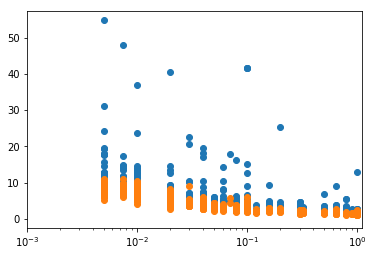

In [12]:
x = np.linspace(min(mse.min(), lr_mse.min()), max(mse.max(), lr_mse.max()))
plt.scatter(contrast.astype(float), lr_mse)
plt.scatter(contrast.astype(float), mse)

plt.gca().set_xscale('log')
plt.gca().set_xlim([0.001, 1.1])
#plt.plot(x, x, '--')

(0.001, 1.1)

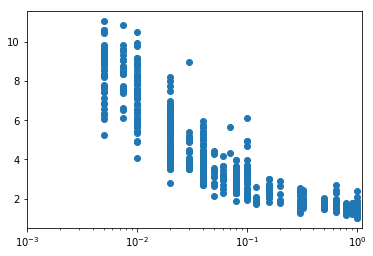

In [13]:
plt.scatter(contrast.astype(float), mse)
plt.gca().set_xscale('log')
plt.gca().set_xlim([0.001, 1.1])

In [4]:
cd_dataset = dj.create_virtual_module('cd_dataset', 'edgar_cd_dataset')
class_discrimination = dj.create_virtual_module('class_discrimination', 'edgar_class_discrimination')
sessions = (class_discrimination.SpikeCountSet()).fetch(dj.key)
# Select a single session
key = sessions[4]
v = (train.CleanContrastSessionDataSet() * class_discrimination.CSCLookup() & key & 'dataset_contrast = 0.9').fetch1(dj.key)

In [11]:
from v1_likelihood.train import *

In [12]:
self = CVTrainedModel()

In [16]:
key = (self.key_source & v).fetch(dj.key, limit=1)[0]

In [45]:
print('Working!')

train_set, test_set = (CVSet() & key).fetch_datasets()
bin_width, bin_counts, clip_outside = (BinConfig() & key).fetch1('bin_width', 'bin_counts', 'clip_outside')
bin_counts = int(bin_counts)
bin_width = float(bin_width)
delta = bin_width

train_counts, train_ori = np.concatenate(train_set['counts'], 1).T, train_set['orientation']
test_counts, test_ori = np.concatenate(test_set['counts'], 1).T, test_set['orientation']

xv, train_bins = binnify(train_ori, delta=bin_width, nbins=bin_counts, clip=clip_outside)
_, test_bins = binnify(test_ori, delta=bin_width, nbins=bin_counts, clip=clip_outside)

good_pos = train_bins >= 0
train_counts = train_counts[good_pos]
train_bins = train_bins[good_pos]

good_pos = test_bins >= 0
test_counts = test_counts[good_pos]
test_bins = test_bins[good_pos]

Working!


In [57]:
print(v)

{'csc_hash': 'b047337460082b62b44a8bc4ccfb4c400b6c9e95', 'dataset_contrast': '0.9'}


## Linear regression

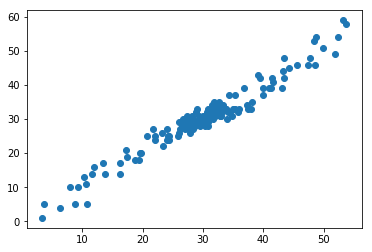

In [20]:
def extend_ones(x):
    return np.concatenate([x, np.ones([x.shape[0], 1])], axis=1)

tc = extend_ones(train_counts)

w = inv(tc.T @ tc + np.diag(np.ones(tc.shape[1]) * 0.0001)) @ tc.T @ train_bins

t_hat = extend_ones(test_counts) @ w

plt.scatter(t_hat, test_bins)

In [56]:
sigmaA = 3
sigmaB = 15

prior = np.log(np.exp(- xv ** 2 / 2 / sigmaA ** 2) / sigmaA + np.exp(- xv ** 2 / 2 / sigmaB ** 2) / sigmaB)
prior = Variable(torch.from_numpy(prior)).cuda().float()

train_x = torch.Tensor(train_counts)
train_t = torch.Tensor(train_bins).type(torch.LongTensor)

valid_x = Variable(torch.Tensor(test_counts)).cuda()
valid_t = Variable(torch.Tensor(test_bins).type(torch.LongTensor)).cuda()

train_dataset = TensorDataset(train_x, train_t)
valid_dataset = TensorDataset(valid_x, valid_t)

def objective(net, x=None, t=None):
    if x is None and t is None:
        x = valid_x
        t = valid_t
    net.eval()
    y = net(x)
    posterior = y + prior
    _, loc = torch.max(posterior, dim=1)
    v = (t.double() - loc.double()).pow(2).mean().sqrt() * bin_width
    return v.data.cpu().numpy()[0]

In [41]:
def objective(net, x=None, t=None):
    if x is None and t is None:
        x = valid_x
        t = valid_t
    net.eval()
    y = net(x)
    posterior = y + prior
    _, loc = torch.max(posterior, dim=1)
    v =(t.double() - loc.double()).pow(2).mean().sqrt() * delta
    return v.data.cpu().numpy()[0]
    #return loss(valid_y, valid_t).data.cpu().numpy()[0]

In [42]:
class Net(nn.Module):
    def __init__(self, n_channel=96, n_hidden=100, n_output=61, dropout=0.9, std=0.01):
        super().__init__()
        self.n_channel = n_channel
        self.std = std
        self.n_output = n_output
        self.dropout = dropout
        
        if not isinstance(n_hidden, (list, tuple)):
            n_hidden = (n_hidden,)
        
        self.n_hidden = n_hidden
        
        n_prev = n_channel
        
        hiddens = []
        
        for n in n_hidden:
            hiddens.append(nn.Linear(n_prev, n))
            hiddens.append(nn.ReLU())
            if dropout > 0.0:
                hiddens.append(nn.Dropout(p=dropout, inplace=True))
            n_prev = n
        if len(hiddens) > 0:
            self.hiddens = nn.Sequential(*hiddens)
        else:
            self.hiddens = lambda x: x
        self.ro_layer = nn.Linear(n_prev, n_output)
        
        self.initialize()
        
        
    def forward(self, x):
        x = self.hiddens(x)
        x = self.ro_layer(x)
        return x
    
    def initialize(self):
        def fn(mod):
            if isinstance(mod, nn.Linear):
                normal(mod.weight, std=self.std)
                constant(mod.bias, 0)
        self.apply(fn)

In [43]:
net = Net(n_output=61, n_hidden=[400, 400], std=0.001, dropout=0.5)
net.cuda()
loss = nn.CrossEntropyLoss().cuda()

In [44]:
net.std = 1e-3
net.initialize()

alpha = 0.3 #3e-2 #7e-3 #1e-3


#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3000, gamma=0.3)
learning_rates = 0.03 * 3.0**(-np.arange(3))

for lr in learning_rates:
    print('\n\n\n\n LEARNING RATE: {}'.format(lr))
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    for epoch, valid_score in early_stopping(net, objective, interval=20, start=100, patience=20, max_iter=300000, maximize=False):
        data_loader = DataLoader(train_dataset, shuffle=True, batch_size=128)
        for x_, t_ in data_loader:
            x, t = Variable(x_).cuda(), Variable(t_).cuda()
            net.train()
            optimizer.zero_grad()
            y = net(x)
            post = y + prior
            val, _ = post.max(1, keepdim=True)
            post = post - val
            #sparcity = y.abs().sum(1).mean()
            conv_filter = Variable(torch.from_numpy(np.array([-0.25, 0.5, -0.25])[None, None, :]).type(y.data.type()))
            smoothness = nn.functional.conv1d(y.unsqueeze(1), conv_filter).pow(2).mean()
            score = loss(post, t)
            score = score + alpha * smoothness
            score.backward()
            optimizer.step()
        if epoch % 10 == 0:
            print('Score: {}'.format(score.data.cpu().numpy()[0]))
        #scheduler.step()





 LEARNING RATE: 0.03


NameError: name 'delta' is not defined

In [ ]:
## setup model
h1, h2 = (ModelDesign() & key).fetch1('hidden1', 'hidden2')
h1, h2 = int(h1), int(h2)
lr, dropout, init_std, alpha = (TrainParam() & key).fetch1('learning_rate', 'dropout', 'init_std', 'smoothness')
lr, dropout, init_std, alpha = float(lr), float(dropout), float(init_std), float(alpha)

## train the network
set_seed(key['train_seed'])
net = Net(n_output=bin_counts, n_hidden=[h1, h2], std=init_std, dropout=dropout)
net.cuda()
loss = nn.CrossEntropyLoss().cuda()

learning_rates = lr * 3.0**(-np.arange(4))
for lr in learning_rates:
    print('\n\n\n\n LEARNING RATE: {}'.format(lr))
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    for epoch, valid_score in early_stopping(net, objective, interval=20, start=100, patience=20, max_iter=300000, maximize=False):
        data_loader = DataLoader(train_dataset, shuffle=True, batch_size=128)
        for x_, t_ in data_loader:
            x, t = Variable(x_).cuda(), Variable(t_).cuda()
            net.train()
            optimizer.zero_grad()
            y = net(x)
            post = y + prior
            val, _ = post.max(1, keepdim=True)
            post = post - val
            #sparcity = y.abs().sum(1).mean()
            conv_filter = Variable(torch.from_numpy(np.array([-0.25, 0.5, -0.25])[None, None, :]).type(y.data.type()))
            smoothness = nn.functional.conv1d(y.unsqueeze(1), conv_filter).pow(2).mean()
            score = loss(post, t)
            score = score + alpha * smoothness
            score.backward()
            optimizer.step()
        # if epoch % 10 == 0:
        #     print('Score: {}'.format(score.data.cpu().numpy()[0]))


net.eval()

key['cnn_trainset_score'] = objective(net, x=Variable(train_x).cuda(), t=Variable(train_t).cuda())
key['cnn_testset_score'] = objective(net, x=test_x, t=test_t)

y = net(test_x)
yd = y.data.cpu().numpy()
yd = np.exp(yd)
yd = yd / yd.sum(axis=1, keepdims=True)

loc = yd.argmax(axis=1)
ds = (np.arange(bin_counts) - loc[:, None]) ** 2
avg_sigma = np.mean(np.sqrt(np.sum(yd * ds, axis=1))) * bin_width
if np.isnan(avg_sigma):
  avg_sigma = -1

key['avg_sigma'] = avg_sigma
key['model'] = {k: v.cpu().numpy() for k, v in net.state_dict().items()}

self.insert1(key)

In [5]:
train.CVSet().populate(v)

Working on  {'csc_hash': 'b047337460082b62b44a8bc4ccfb4c400b6c9e95', 'cv_seed': 35, 'dataset_contrast': '0.9', 'cv_config_id': '57eeec0a6974ecb4e9fcf68fab052f7b'}


In [6]:
train.CVTrainedModel().populate(v)

Working!
Setting numpy and torch seed to 8




 LEARNING RATE: 0.03
[120|01/20] -/-> 31.923566435467883
[140|02/20] -/-> 31.923566435467883
[160|03/20] -/-> 31.923566435467883
[180|03/20] ---> 12.381247999027515
[200|01/20] -/-> 30.975309500596087
[220|02/20] -/-> 30.975309500596087
[240|03/20] -/-> 30.975309500596087
[260|04/20] -/-> 30.975309500596087
[280|05/20] -/-> 30.975309500596087
[300|06/20] -/-> 29.08919400832019
[320|07/20] -/-> 29.08919400832019
[340|08/20] -/-> 29.08919400832019
[360|09/20] -/-> 29.08919400832019
[380|10/20] -/-> 29.08919400832019
[400|11/20] -/-> 29.08919400832019
[420|12/20] -/-> 28.1520321247273
[440|13/20] -/-> 28.1520321247273
[460|14/20] -/-> 27.219342707891833
[480|15/20] -/-> 27.219342707891833
[500|16/20] -/-> 27.219342707891833
[520|17/20] -/-> 27.219342707891833
[540|18/20] -/-> 27.219342707891833
[560|19/20] -/-> 26.291601741766343
[580|20/20] -/-> 26.291601741766343
Restoring best model! 26.291602 ---> 12.381248




 LEARNING RATE: 0.009999999

[400|15/20] -/-> 23.54390443918788
[420|16/20] -/-> 11.314005100290347
[440|17/20] -/-> 11.314005100290347
[460|18/20] -/-> 10.071222875169742
[480|19/20] -/-> 10.071222875169742
[500|20/20] -/-> 10.522267854667506
Restoring best model! 10.522268 ---> 10.007044




 LEARNING RATE: 0.003333333333333333
[120|01/20] -/-> 10.007044498617732
[140|02/20] -/-> 10.007044498617732
[160|03/20] -/-> 10.007044498617732
[180|04/20] -/-> 10.007044498617732
[200|05/20] -/-> 10.007044498617732
[220|06/20] -/-> 10.007044498617732
[240|07/20] -/-> 10.007044498617732
[260|08/20] -/-> 10.007044498617732
[280|09/20] -/-> 10.007044498617732
[300|10/20] -/-> 10.007044498617732
[320|11/20] -/-> 10.007044498617732
[340|12/20] -/-> 10.007044498617732
[360|13/20] -/-> 10.007044498617732
[380|14/20] -/-> 10.007044498617732
[400|15/20] -/-> 10.007044498617732
[420|16/20] -/-> 10.007044498617732
[440|17/20] -/-> 10.007044498617732
[460|18/20] -/-> 10.007044498617732
[480|19/20] -/-> 10.007044498617732
[500|20/20] -

/src/v1_likelihood/v1_likelihood/train.py:306: RuntimeWarning: overflow encountered in exp
  yd = np.exp(yd)
/src/v1_likelihood/v1_likelihood/train.py:307: RuntimeWarning: invalid value encountered in true_divide
  yd = yd / yd.sum(axis=1, keepdims=True)


Setting numpy and torch seed to 8




 LEARNING RATE: 0.03
[120|01/20] -/-> 31.923566435467883
[140|02/20] -/-> 31.923566435467883
[160|02/20] ---> 26.291601741766343
[180|00/20] ---> 10.250552448690543
[200|01/20] -/-> 10.250552448690543
[220|02/20] -/-> 10.250552448690543
[240|03/20] -/-> 10.250552448690543
[260|04/20] -/-> 10.250552448690543
[280|04/20] ---> 10.071222875169742
[300|01/20] -/-> 10.071222875169742
[320|02/20] -/-> 10.071222875169742
[340|03/20] -/-> 10.071222875169742
[360|04/20] -/-> 10.071222875169742
[380|05/20] -/-> 10.250552448690543
[400|06/20] -/-> 10.071222875169742
[420|07/20] -/-> 10.071222875169742
[440|08/20] -/-> 10.250552448690543
[460|09/20] -/-> 10.071222875169742
[480|10/20] -/-> 10.071222875169742
[500|11/20] -/-> 10.250552448690543
[520|12/20] -/-> 10.071222875169742
[540|13/20] -/-> 10.250552448690543
[560|14/20] -/-> 10.250552448690543
[580|15/20] -/-> 10.071222875169742
[600|16/20] -/-> 10.071222875169742
[620|17/20] -/-> 10.250552448690543
[640|

[340|12/20] -/-> 10.071222875169742
[360|13/20] -/-> 10.071222875169742
[380|14/20] -/-> 10.071222875169742
[400|15/20] -/-> 10.071222875169742
[420|16/20] -/-> 10.071222875169742
[440|17/20] -/-> 10.071222875169742
[460|18/20] -/-> 10.071222875169742
[480|19/20] -/-> 10.071222875169742
[500|20/20] -/-> 10.071222875169742
Restoring best model! 10.071223 ---> 10.071223




 LEARNING RATE: 0.0011111111111111111
[120|01/20] -/-> 10.071222875169742
[140|02/20] -/-> 10.071222875169742
[160|03/20] -/-> 10.071222875169742
[180|04/20] -/-> 10.071222875169742
[200|05/20] -/-> 10.071222875169742
[220|06/20] -/-> 10.071222875169742
[240|07/20] -/-> 10.071222875169742
[260|08/20] -/-> 10.071222875169742
[280|09/20] -/-> 10.071222875169742
[300|10/20] -/-> 10.071222875169742
[320|11/20] -/-> 10.071222875169742
[340|12/20] -/-> 10.071222875169742
[360|13/20] -/-> 10.071222875169742
[380|14/20] -/-> 10.071222875169742
[400|15/20] -/-> 10.071222875169742
[420|16/20] -/-> 10.071222875169742
[440|17/20]

[220|02/20] -/-> 10.250552448690543
[240|03/20] -/-> 10.250552448690543
[260|03/20] ---> 10.071222875169742
[280|01/20] -/-> 10.071222875169742
[300|02/20] -/-> 10.250552448690543
[320|03/20] -/-> 10.071222875169742
[340|04/20] -/-> 10.250552448690543
[360|05/20] -/-> 10.071222875169742
[380|06/20] -/-> 10.071222875169742
[400|07/20] -/-> 10.250552448690543
[420|08/20] -/-> 10.071222875169742


KeyboardInterrupt: 

In [ ]:
from v1_li

In [4]:
@schema
class Test(dj.Lookup):
    definition = """
    id : int  
    """
    contents = zip(range(100))

In [8]:
@schema
class Square(dj.Computed):
    definition = """
    -> Test
    """
    def _make_tuples(self, key):
        print('Working on ', key)
        self.insert1(key)

In [6]:
Square().delete()

NameError: name 'Square' is not defined

In [5]:
train.CVTrainedModel().populate()

DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="#train_seed"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `#train_seed` IN `edgar_cd_ml`
DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="#train_param"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `#train_param` IN `edgar_cd_ml`
DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="__c_v_set"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `__c_v_set` IN `edgar_cd_ml`
DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="#bin_config"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `#bin_config` IN `edgar_cd_ml`
DEBUG:datajoint.connection:Executing SQL:SHOW TABLE STATUS FROM `edgar_cd_ml` WHERE name="#model_design"
DEBUG:datajoint.connection:Executing SQL:SHOW FULL COLUMNS FROM `#model_design` IN `edgar_cd_ml`
DEBUG:da

Working!


DEBUG:datajoint.relational_operand:SELECT `csc_hash`,`dataset_contrast` FROM `edgar_cd_dataset`.`__clean_contrast_session_data_set` WHERE ((`csc_hash`,`dataset_contrast`) in (SELECT `csc_hash`,`dataset_contrast` FROM `edgar_cd_ml`.`__c_v_set` WHERE ((`dataset_contrast`='0.005') AND (`csc_hash`='0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7') AND (`cv_fraction`='0.800') AND (`cv_seed`=35))))
DEBUG:datajoint.connection:Executing SQL:SELECT `csc_hash`,`dataset_contrast` FROM `edgar_cd_dataset`.`__clean_contrast_session_data_set` WHERE ((`csc_hash`,`dataset_contrast`) in (SELECT `csc_hash`,`dataset_contrast` FROM `edgar_cd_ml`.`__c_v_set` WHERE ((`dataset_contrast`='0.005') AND (`csc_hash`='0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b
DEBUG:datajoint.relational_operand:SELECT `csc_hash`,`dataset_contrast`,`cv_seed`,`cv_fraction`,`train_index`,`test_index` FROM `edgar_cd_ml`.`__c_v_set` WHERE ((`dataset_contrast`='0.005') AND (`csc_hash`='0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7') AND (`cv_fraction`=

Setting numpy and torch seed to 8




 LEARNING RATE: 0.1
[120|00/20] ---> 19.0468650644422
[140|01/20] -/-> 19.0468650644422
[160|02/20] -/-> 19.0468650644422
[180|03/20] -/-> 19.0468650644422
[200|04/20] -/-> 19.0468650644422
[220|05/20] -/-> 19.0468650644422
[240|06/20] -/-> 19.0468650644422
[260|07/20] -/-> 19.0468650644422


DEBUG:datajoint.connection:Executing SQL:ROLLBACK
INFO:datajoint.connection:Transaction cancelled. Rolling back ...


KeyboardInterrupt: 

In [2]:
train.schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp


In [3]:
train.CVTrainedModel()

csc_hash hash for clean spike count set,dataset_contrast contrast of the stimulus,cv_seed seed for the cv set,cv_fraction fraction,bin_config_id id,model_id model id,param_id ID of parameter,train_seed training seed,cnn_trainset_score score on train set,cnn_testset_score score on test set,avg_sigma average width of the likelihood functions,model trained model


In [2]:
train.CVTrainedModel()

csc_hash hash for clean spike count set,dataset_contrast contrast of the stimulus,cv_seed seed for the cv set,cv_fraction fraction,bin_config_id id,model_id model id,param_id ID of parameter,train_seed training seed,cnn_trainset_score score on train set,cnn_testset_score score on test set,avg_sigma average width of the likelihood functions,model trained model


In [ ]:
train.

In [2]:
train.CVTrainedModel().populate(liorder='random')

Setting numpy and torch seed to 8




 LEARNING RATE: 0.1
[120|00/20] ---> 19.0468650644422
[140|01/20] -/-> 19.0468650644422
[160|02/20] -/-> 19.0468650644422
[180|03/20] -/-> 19.0468650644422
[200|04/20] -/-> 19.0468650644422
[220|05/20] -/-> 19.0468650644422
[240|06/20] -/-> 19.0468650644422
[260|07/20] -/-> 19.0468650644422
[280|08/20] -/-> 19.0468650644422
[300|09/20] -/-> 19.0468650644422
[320|10/20] -/-> 19.0468650644422
[340|11/20] -/-> 19.0468650644422
[360|12/20] -/-> 19.0468650644422
[380|13/20] -/-> 19.0468650644422
[400|14/20] -/-> 19.0468650644422
[420|15/20] -/-> 19.0468650644422
[440|16/20] -/-> 19.0468650644422
[460|17/20] -/-> 19.0468650644422
[480|18/20] -/-> 19.0468650644422
[500|19/20] -/-> 19.0468650644422
[520|20/20] -/-> 19.0468650644422
Restoring best model! 19.046865 ---> 19.046865




 LEARNING RATE: 0.03333333333333333
[120|01/20] -/-> 19.0468650644422
[140|02/20] -/-> 19.0468650644422
[160|03/20] -/-> 19.0468650644422
[180|04/20] -/-> 19.0468650644422
[200|

IntegrityError: (1048, "Column 'avg_sigma' cannot be null")

In [ ]:
%debug

> /usr/local/lib/python3.5/dist-packages/pymysql/err.py(107)raise_mysql_exception()
    103         errval = data[9:].decode('utf-8', 'replace')
    104     else:
    105         errval = data[3:].decode('utf-8', 'replace')
    106     errorclass = error_map.get(errno, InternalError)
--> 107     raise errorclass(errno, errval)

ipdb> u
> /usr/local/lib/python3.5/dist-packages/pymysql/connections.py(393)check_error()
    391             errno = self.read_uint16()
    392             if DEBUG: print("errno =", errno)
--> 393             err.raise_mysql_exception(self._data)
    394 
    395     def dump(self):

ipdb> u
> /usr/local/lib/python3.5/dist-packages/pymysql/connections.py(1014)_read_packet()
   1012 
   1013         packet = packet_type(buff, self.encoding)
-> 1014         packet.check_error()
   1015         return packet
   1016 

ipdb> u
> /usr/local/lib/python3.5/dist-packages/pymysql/connections.py(1349)read()
   1347                 self._read_result_packet(first_packet)


ipdb> key
{'train_seed': 8, 'param_id': '1c9d087d1acc2030f44c97c5ca288485', 'model_id': '52d710e0dc1cff3d59fb94fff0499f88', 'avg_sigma': nan, 'dataset_contrast': '0.005', 'cnn_testset_score': 19.046865064442201, 'cv_seed': 35, 'cv_fraction': Decimal('0.800'), 'model': {'ro_layer.weight': array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32), 'hiddens.3.bias': array([ -3.53210175e+02,              nan,  -2.48155155e+01,
         6.48050558e+36,  -2.83248292e+10,  -1.25473941e+12,
        -2.16099780e+03,              nan,  -4.80203940e+10,
        -2.95642422e+32,  -4.03827789e+09,  -5.95515930e+02,
        -4.63004828e+11,              nan,  -7.63338906e+04,
        -1.37200069e+30,  -3.96425921e+11,  -8.91210709e+0

ipdb> key['avg_sigma'
*** SyntaxError: unexpected EOF while parsing
ipdb> key['avg_sigma']
nan
ipdb> yd
array([[ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       ..., 
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan],
       [ nan,  nan,  nan, ...,  nan,  nan,  nan]], dtype=float32)
ipdb> test_x
Variable containing:
    3     0     0  ...      0    28     0
   14     0     0  ...      0    29     0
   13     1     0  ...      0    38     0
       ...          ⋱          ...       
    8     0     0  ...      0    30     0
    3     0     0  ...      3    23     0
    9     0     0  ...      0    25     0
[torch.cuda.FloatTensor of size 189x96 (GPU 0)]

ipdb> net(test_x)
Variable containing:
  nan   nan   nan  ...    nan   nan   nan
  nan   nan   nan  ...    nan   nan   nan
  nan   nan   nan  ...    nan   nan   nan
       ...          ⋱    

In [ ]:
%debug

> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(920)_blas()
    918             else:
    919                 tensors = args
--> 920             return cls.apply(*(tensors + (alpha, beta, inplace)))
    921 
    922         @classmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(924)addmm()
    922         @classmethod
    923         def addmm(cls, *args):
--> 924             return cls._blas(Addmm, args, False)
    925 
    926         @classmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/nn/functional.py(553)linear()
    551     if input.dim() == 2 and bias is not None:
    552         # fused op is marginally faster
--> 553         return torch.addmm(bias, input, weight.t())
    554 
    555     output = input.matmul(weight.t())

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/nn/modules/linear.py(53)forward()
     51 
     52     def forward(self, input):
---> 53         return F.linear(input, self.weight,

ipdb> x

   11     0     0  ...      0    19     0
    5     0     0  ...      3    17     0
   12     0     0  ...      0    23     0
       ...          ⋱          ...       
    4     0     0  ...      0    28     1
    2     1     0  ...      0    35     0
    5     0     0  ...      0    27     0
[torch.cuda.FloatTensor of size 770x96 (GPU 0)]

ipdb> net
Net (
  (hiddens): Sequential (
    (0): Linear (96 -> 500)
    (1): ReLU ()
    (2): Dropout (p = 0.5, inplace)
    (3): Linear (500 -> 500)
    (4): ReLU ()
    (5): Dropout (p = 0.5, inplace)
  )
  (ro_layer): Linear (500 -> 61)
)
ipdb> net(x)
*** RuntimeError: save_for_backward can only save input or output tensors, but argument 0 doesn't satisfy this condition


In [ ]:
%debug

> /usr/local/lib/python3.5/dist-packages/torch/autograd/_functions/blas.py(26)forward()
     24         output = _get_output(ctx, add_matrix, inplace=inplace)
     25         return torch.addmm(alpha, add_matrix, beta,
---> 26                            matrix1, matrix2, out=output)
     27 
     28     @staticmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(920)_blas()
    918             else:
    919                 tensors = args
--> 920             return cls.apply(*(tensors + (alpha, beta, inplace)))
    921 
    922         @classmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(924)addmm()
    922         @classmethod
    923         def addmm(cls, *args):
--> 924             return cls._blas(Addmm, args, False)
    925 
    926         @classmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/nn/functional.py(553)linear()
    551     if input.dim() == 2 and bias is not None:
    552         # fused

In [ ]:
%debug

> /usr/local/lib/python3.5/dist-packages/torch/autograd/_functions/basic_ops.py(104)forward()
    102             return tensor.add_(constant)
    103         else:
--> 104             return tensor.add(constant)
    105 
    106     @staticmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(316)_add()
    314         else:
    315             assert not torch.is_tensor(other)
--> 316             return AddConstant.apply(self, other, inplace)
    317 
    318     def add(self, other):

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(319)add()
    317 
    318     def add(self, other):
--> 319         return self._add(other, False)
    320 
    321     def add_(self, other):

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(813)__add__()
    811 
    812     def __add__(self, other):
--> 813         return self.add(other)
    814     __radd__ = __add__
    815 

ipdb> u
> /src/v1_likelihood/v1_likelih

In [ ]:
%debug

> /usr/local/lib/python3.5/dist-packages/torch/autograd/_functions/basic_ops.py(17)forward()
     15             return a.add_(b)
     16         else:
---> 17             return a.add(b)
     18 
     19     @staticmethod

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(313)_add()
    311     def _add(self, other, inplace):
    312         if isinstance(other, Variable):
--> 313             return Add.apply(self, other, inplace)
    314         else:
    315             assert not torch.is_tensor(other)

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(319)add()
    317 
    318     def add(self, other):
--> 319         return self._add(other, False)
    320 
    321     def add_(self, other):

ipdb> u
> /usr/local/lib/python3.5/dist-packages/torch/autograd/variable.py(813)__add__()
    811 
    812     def __add__(self, other):
--> 813         return self.add(other)
    814     __radd__ = __add__
    815 

ipdb> u
> /src/v1_likel

In [ ]:
%debug

> /usr/local/lib/python3.5/dist-packages/torch/nn/modules/linear.py(39)__init__()
     37         self.in_features = in_features
     38         self.out_features = out_features
---> 39         self.weight = Parameter(torch.Tensor(out_features, in_features))
     40         if bias:
     41             self.bias = Parameter(torch.Tensor(out_features))

ipdb> u
> /src/v1_likelihood/v1_likelihood/models.py(25)__init__()
     23 
     24         for n in n_hidden:
---> 25             hiddens.append(nn.Linear(n_prev, n))
     26             hiddens.append(nn.ReLU())
     27             if dropout > 0.0:

ipdb> u
> /src/v1_likelihood/v1_likelihood/train.py(275)_make_tuples()
    273         ## train the network
    274         set_seed(key['train_seed'])
--> 275         net = Net(n_hidden=[h1, h2], std=init_std, dropout=dropout)
    276         net.cuda()
    277         loss = nn.CrossEntropyLoss().cuda()



In [10]:
x, y = train.LinearRegression().fetch('dataset_contrast', 'lr_testset_score')

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

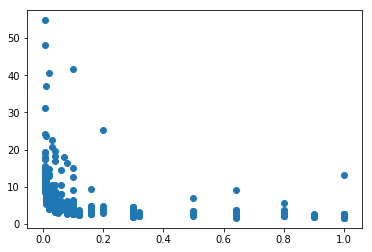

In [14]:
plt.scatter(x.astype('float'), y)

In [7]:
train.LinearRegression()

bin_config_id id,csc_hash hash for clean spike count set,dataset_contrast contrast of the stimulus,cv_seed seed for the cv set,cv_fraction fraction,lr_weights learned weights,lr_trainset_score score on trainset,lr_testset_score score on testset
9c9248d6b67fe1d8348bc51605658447,0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7,0.005,35,0.800,=BLOB=,8.80198,10.3265
9c9248d6b67fe1d8348bc51605658447,0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7,0.04,35,0.800,=BLOB=,4.12118,4.83828
9c9248d6b67fe1d8348bc51605658447,0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7,0.32,35,0.800,=BLOB=,2.47696,2.92996
9c9248d6b67fe1d8348bc51605658447,0732f2b73f4900ee4fa81f8853b48e460a42ee14,0.02,35,0.800,=BLOB=,3.79281,4.52524
9c9248d6b67fe1d8348bc51605658447,0732f2b73f4900ee4fa81f8853b48e460a42ee14,0.16,35,0.800,=BLOB=,2.12098,2.67761
9c9248d6b67fe1d8348bc51605658447,0732f2b73f4900ee4fa81f8853b48e460a42ee14,1,35,0.800,=BLOB=,1.36246,1.66398
9c9248d6b67fe1d8348bc51605658447,0821d6c856639dcb7bb67b1dc8d0f2339b60e27f,0.01,35,0.800,=BLOB=,6.79577,8.38956


In [5]:
train.LinearRegression(limit=30)

TypeError: __init__() got an unexpected keyword argument 'limit'

In [15]:
import numpy as np

In [7]:
key = train.CVSet().fetch(dj.key, limit=1)

In [9]:
trainset, testset = (train.CVSet() & key).fetch_datasets()


In [10]:
len(trainset)

786

In [11]:
len(testset)

196

In [4]:
train.CVSet() & key

csc_hash hash for clean spike count set,dataset_contrast contrast of the stimulus,cv_seed seed for the cv set,cv_fraction fraction,train_index training indices,test_index testing indices


In [19]:
train_counts = np.concatenate(trainset['counts'], 1).T

In [22]:
train_ori = trainset['orientation']


In [24]:
np.percentile(np.abs(train_ori - 270), 98)

30.525099999999991

In [2]:
train.CVConfig()

cv_fraction fraction
0.800


In [4]:
train.CVSet()

csc_hash hash for clean spike count set,dataset_contrast contrast of the stimulus,cv_seed seed for the cv set,cv_fraction fraction,train_index training indices,test_index testing indices


In [2]:
train.CVSet().populate(display_progress=True)

  0%|          | 0/546 [00:00<?, ?it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.3'}


  0%|          | 2/546 [00:00<02:40,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fda661587b2c4f5a874d8e6d6fd548d5b65ba946', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.01'}


  1%|          | 3/546 [00:01<03:05,  2.92it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '475f38c7100db2ad340ea0cebf2e2e12316d5185', 'cv_seed': 35, 'dataset_contrast': '0.01'}


  1%|          | 4/546 [00:01<03:01,  2.99it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e836bece03509ad91ba6730b279ac2bbb0692837', 'cv_seed': 35, 'dataset_contrast': '0.03'}


  1%|          | 5/546 [00:01<02:55,  3.09it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '278e048c46b21ed361389623594ea8b38933a73e', 'cv_seed': 35, 'dataset_contrast': '0.01'}


  1%|          | 6/546 [00:02<03:08,  2.87it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e19611e63e2448a5a575112f05dea655901566da', 'cv_seed': 35, 'dataset_contrast': '0.16'}


  1%|▏         | 7/546 [00:02<03:12,  2.80it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.06'}


  1%|▏         | 8/546 [00:02<03:13,  2.78it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '51b960a5b405e0e962575d2243e7561adc7efbff', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  2%|▏         | 9/546 [00:03<03:14,  2.77it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e01c5eaaf24f05760951aaecf409f03a37914614', 'cv_seed': 35, 'dataset_contrast': '0.32'}


  2%|▏         | 10/546 [00:03<03:06,  2.87it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.005'}


  2%|▏         | 11/546 [00:03<03:14,  2.75it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e487412b5a2cd5fee148f559ede07a9f9a01fefe', 'cv_seed': 35, 'dataset_contrast': '0.01'}


  2%|▏         | 13/546 [00:04<02:59,  2.97it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0025d7ceed62df92948b7b9ee24ca5af4430819', 'cv_seed': 35, 'dataset_contrast': '0.32'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28c77b71e75b7840db8647d1b8c057d11bec0ac6', 'cv_seed': 35, 'dataset_contrast': '0.0075'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ddcdce38e20102738ed904dcdd3382b628133670', 'cv_seed': 35, 'dataset_contrast': '0.9'}


  3%|▎         | 15/546 [00:04<02:46,  3.19it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5fd8a24ea5da186d064a03cebcf1c7f00c055b32', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  3%|▎         | 16/546 [00:04<02:43,  3.25it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '78e8463fc9152455bb0d127793479c1e79bc99db', 'cv_seed': 35, 'dataset_contrast': '0.03'}


  3%|▎         | 17/546 [00:05<02:40,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '921f51f43417bd8069c1c6397b95ca87f99e62e9', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


  3%|▎         | 18/546 [00:05<02:38,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '62eb64f1639bcd29c9bdb9f49b9f0127d8a3e7ab', 'cv_seed': 35, 'dataset_contrast': '0.08'}


  4%|▎         | 20/546 [00:05<02:36,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c0cdbfe32ed3bcf23585f5e492c48d2a12b70e88', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24770feca3fe6c70354771176ee82ce018f35fc3', 'cv_seed': 35, 'dataset_contrast': '0.12'}


  4%|▍         | 22/546 [00:06<02:33,  3.41it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '79d12eb4817ad9af0e1dde52b3781abf70e433c3', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '64ffffc3f24c83fc605e0f961ec3a492b70e0c48', 'cv_seed': 35, 'dataset_contrast': '0.005'}


  4%|▍         | 23/546 [00:06<02:32,  3.42it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28d193a484b1d17b97f974b84d3b7d84e1f6b399', 'cv_seed': 35, 'dataset_contrast': '1'}


  5%|▍         | 25/546 [00:07<02:32,  3.42it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '993a53d8700df5e6739c48783231b7beb275d8fb', 'cv_seed': 35, 'dataset_contrast': '0.06'}


  5%|▍         | 26/546 [00:07<02:33,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '1'}


  5%|▍         | 27/546 [00:08<02:37,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '34f05caf601a3685942af9ca472161f466b80dbd', 'cv_seed': 35, 'dataset_contrast': '0.005'}


  5%|▌         | 28/546 [00:08<02:35,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0c962104ee2d677c7e2c50c109202dbe6df0f166', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  5%|▌         | 29/546 [00:08<02:34,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.005'}


  5%|▌         | 30/546 [00:09<02:35,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  6%|▌         | 31/546 [00:09<02:35,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2874cecca06db7eb61ecf6919002882749b57f5e', 'cv_seed': 35, 'dataset_contrast': '0.02'}


  6%|▌         | 32/546 [00:09<02:34,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.16'}


  6%|▌         | 33/546 [00:10<02:35,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.005'}


  6%|▌         | 34/546 [00:10<02:37,  3.26it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '32d0da84f717b430c94d198ab0c28ae6a61e7960', 'cv_seed': 35, 'dataset_contrast': '0.1'}


  6%|▋         | 35/546 [00:10<02:36,  3.26it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'dd3a08df47c7b50bd9192dcecb31af5bdf191e88', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


  7%|▋         | 37/546 [00:11<02:34,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1aed66333230d886982b798fc3a5ab34f42449d0', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


  7%|▋         | 38/546 [00:11<02:34,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.8'}


  7%|▋         | 40/546 [00:12<02:34,  3.28it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c0cdbfe32ed3bcf23585f5e492c48d2a12b70e88', 'cv_seed': 35, 'dataset_contrast': '0.1'}


  8%|▊         | 41/546 [00:12<02:31,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9251fde390751ae17a47331d5d9fe43785bff226', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.005'}


  8%|▊         | 42/546 [00:12<02:31,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8ec098f0eff3b20dab37294915f83a883ed89039', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  8%|▊         | 44/546 [00:13<02:30,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fd79483ca30feea2d7d5abf36d097bbc9b1d5862', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.16'}


  8%|▊         | 45/546 [00:13<02:30,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2874cecca06db7eb61ecf6919002882749b57f5e', 'cv_seed': 35, 'dataset_contrast': '0.05'}


  8%|▊         | 46/546 [00:13<02:30,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e1c10126aa8e05160780201356872acee656c82f', 'cv_seed': 35, 'dataset_contrast': '0.02'}


  9%|▊         | 47/546 [00:14<02:29,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '80c9c2cb0c2391c599471322e8299003a23698f0', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  9%|▉         | 48/546 [00:14<02:30,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fe61e21a3e13a93f11e9bc1f24663db66c409ae5', 'cv_seed': 35, 'dataset_contrast': '0.1'}


  9%|▉         | 49/546 [00:14<02:30,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '97c8f15c66f1b50b7ae3065019d147918f3a7e70', 'cv_seed': 35, 'dataset_contrast': '0.64'}


  9%|▉         | 50/546 [00:15<02:30,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0821d6c856639dcb7bb67b1dc8d0f2339b60e27f', 'cv_seed': 35, 'dataset_contrast': '0.04'}


  9%|▉         | 51/546 [00:15<02:30,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 10%|▉         | 52/546 [00:15<02:30,  3.27it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 10%|▉         | 53/546 [00:16<02:31,  3.26it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ddcdce38e20102738ed904dcdd3382b628133670', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 10%|▉         | 54/546 [00:16<02:30,  3.26it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 10%|█         | 55/546 [00:16<02:31,  3.24it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '475f38c7100db2ad340ea0cebf2e2e12316d5185', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 10%|█         | 56/546 [00:17<02:31,  3.24it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '25f592a512ad65e9a57919e7b3275088426f038a', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 10%|█         | 57/546 [00:17<02:31,  3.23it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f2bb838d18277349a62ea2d930d0888f432a461e', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 11%|█         | 58/546 [00:17<02:30,  3.24it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'da82473ef9ed7a9774c6bcaea8c3bd28d5fcf1cc', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 11%|█         | 59/546 [00:18<02:31,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 11%|█         | 60/546 [00:18<02:31,  3.20it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8fa512d98266eb90a060819cc5e751ba72649ca7', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 11%|█         | 61/546 [00:18<02:30,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e3f0fe623e38121668a6e556fa0f4d0dc8a5747d', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 12%|█▏        | 63/546 [00:19<02:29,  3.23it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.0075'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0ab391586f486b3f48e18f056a2b136480255965', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 12%|█▏        | 64/546 [00:19<02:29,  3.23it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '63c91a4642efd7c59d1a3d6fd9617ce01965a321', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 12%|█▏        | 65/546 [00:20<02:28,  3.23it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '921f51f43417bd8069c1c6397b95ca87f99e62e9', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 12%|█▏        | 66/546 [00:20<02:28,  3.24it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 12%|█▏        | 67/546 [00:20<02:27,  3.24it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '1'}


 12%|█▏        | 68/546 [00:21<02:28,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 13%|█▎        | 69/546 [00:21<02:28,  3.20it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0e923470fc00654ba73820360da5af6e80f2e3d4', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 13%|█▎        | 70/546 [00:21<02:28,  3.20it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e487412b5a2cd5fee148f559ede07a9f9a01fefe', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 13%|█▎        | 71/546 [00:22<02:27,  3.21it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1e1c78836c0115d40394bd38973b788d4158d4af', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 13%|█▎        | 72/546 [00:22<02:26,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 13%|█▎        | 73/546 [00:22<02:27,  3.21it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2441b179d24aa5ce319adfc6c94609737cd167c6', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 14%|█▎        | 74/546 [00:23<02:26,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8f9104716b85c7f752851679c69d15b514ebd679', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 14%|█▎        | 75/546 [00:23<02:26,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b6fe0cd3e7186030efe8b3537ec6b7f6eda9d493', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 14%|█▍        | 77/546 [00:23<02:24,  3.24it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.06'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28d193a484b1d17b97f974b84d3b7d84e1f6b399', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 14%|█▍        | 78/546 [00:24<02:24,  3.23it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7240493ec90558085126e57ff8babdab870b0f6a', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 14%|█▍        | 79/546 [00:24<02:25,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '78e8463fc9152455bb0d127793479c1e79bc99db', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 15%|█▍        | 80/546 [00:24<02:24,  3.22it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '79d12eb4817ad9af0e1dde52b3781abf70e433c3', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 15%|█▌        | 82/546 [00:25<02:22,  3.26it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '91e16dafba5483f2d23552a98451f57a92357a4f', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '93c32a7a1ab86a004775787e8de6ffa9bcc151d0', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 15%|█▌        | 83/546 [00:25<02:21,  3.27it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 15%|█▌        | 84/546 [00:25<02:21,  3.27it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '1'}


 16%|█▌        | 86/546 [00:26<02:20,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b9f76f14cb3f856fae883a6840561821a77371bd', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '968ccebe5a33a8b1512d1df15913951240160c2c', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 16%|█▌        | 87/546 [00:26<02:19,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed410917f1ddd18c4244db0eeb1cc8e43e3bdf4', 'cv_seed': 35, 'dataset_contrast': '0.2'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 16%|█▋        | 90/546 [00:27<02:17,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '34f05caf601a3685942af9ca472161f466b80dbd', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 17%|█▋        | 91/546 [00:27<02:17,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 17%|█▋        | 92/546 [00:27<02:17,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2a40a1ed593276618990e54ebcbfa55e71d5a4ee', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 17%|█▋        | 93/546 [00:28<02:17,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e88233833d92c0cd7f912ddf8be1f127523eb7a2', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 17%|█▋        | 95/546 [00:28<02:16,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.5'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9fbcc29a6f2bcca8ebb94a15afc38db71fbd8e60', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 18%|█▊        | 96/546 [00:29<02:16,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1f2c689e507320b1285689c255932d663a92d13c', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 18%|█▊        | 97/546 [00:29<02:15,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e1c10126aa8e05160780201356872acee656c82f', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 18%|█▊        | 98/546 [00:29<02:14,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 18%|█▊        | 99/546 [00:29<02:14,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1f2c689e507320b1285689c255932d663a92d13c', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 18%|█▊        | 101/546 [00:30<02:13,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.8'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '465361b0d23c7ba52f10d70ddf3527f1e10fd266', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 19%|█▊        | 102/546 [00:30<02:12,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8b19498cf522fff44c6f14c2c6a33cc5955d18a7', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 19%|█▉        | 103/546 [00:30<02:12,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 19%|█▉        | 104/546 [00:31<02:12,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '465361b0d23c7ba52f10d70ddf3527f1e10fd266', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 19%|█▉        | 106/546 [00:31<02:10,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24b07dfa5c6deddc1e99948823ec85b14d5bfd79', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '74e4a59f52b629b1ecaeaf6a22419ec3fdabdb85', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 20%|█▉        | 107/546 [00:31<02:10,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b047337460082b62b44a8bc4ccfb4c400b6c9e95', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 20%|█▉        | 108/546 [00:32<02:10,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 20%|█▉        | 109/546 [00:32<02:10,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1e1c78836c0115d40394bd38973b788d4158d4af', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 20%|██        | 110/546 [00:32<02:09,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 20%|██        | 111/546 [00:33<02:09,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 21%|██        | 113/546 [00:33<02:09,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '93c32a7a1ab86a004775787e8de6ffa9bcc151d0', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c72789c65f74388f1c6e96ffd83577c0fa70719c', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 21%|██        | 114/546 [00:33<02:08,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c9e578669108f91a2ed8f7787e9a9b9ce42235d', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 21%|██        | 115/546 [00:34<02:07,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 21%|██        | 116/546 [00:34<02:07,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7240493ec90558085126e57ff8babdab870b0f6a', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 21%|██▏       | 117/546 [00:34<02:07,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 22%|██▏       | 118/546 [00:35<02:07,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a9e108bcb428ab08b62af7ef0ede6029156cd7b7', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 22%|██▏       | 120/546 [00:35<02:06,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f21bf02bd65af0d4231e09274c2ded58199836b6', 'cv_seed': 35, 'dataset_contrast': '0.0075'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'd16d2c47ce599997c4559c7f112a6389d9e8b6b7', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 22%|██▏       | 121/546 [00:36<02:06,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 22%|██▏       | 122/546 [00:36<02:06,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1efcb0c7d005269e44696dca6dfbb06b72cc6164', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 23%|██▎       | 123/546 [00:36<02:06,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '993a53d8700df5e6739c48783231b7beb275d8fb', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 23%|██▎       | 125/546 [00:37<02:06,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '93c32a7a1ab86a004775787e8de6ffa9bcc151d0', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0534116fd0aea4c6fdc4b8908c1fa5fd3d48e5b7', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 23%|██▎       | 126/546 [00:37<02:05,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 23%|██▎       | 127/546 [00:37<02:05,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '51b960a5b405e0e962575d2243e7561adc7efbff', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 23%|██▎       | 128/546 [00:38<02:05,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0821d6c856639dcb7bb67b1dc8d0f2339b60e27f', 'cv_seed': 35, 'dataset_contrast': '0.12'}


 24%|██▎       | 129/546 [00:38<02:04,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c3317bb2daafd989122764cd1c9327819128fd6', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 24%|██▍       | 130/546 [00:38<02:04,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'd82223c0d1988ac47c998690800763aeb47bb898', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 24%|██▍       | 131/546 [00:39<02:04,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e1c10126aa8e05160780201356872acee656c82f', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 24%|██▍       | 132/546 [00:39<02:04,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 24%|██▍       | 133/546 [00:39<02:03,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c9e578669108f91a2ed8f7787e9a9b9ce42235d', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 25%|██▍       | 134/546 [00:40<02:03,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'd82223c0d1988ac47c998690800763aeb47bb898', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 25%|██▍       | 135/546 [00:40<02:03,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108f54ba64caf901230c7a9db910d25691b98177', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 25%|██▍       | 136/546 [00:40<02:02,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a9e108bcb428ab08b62af7ef0ede6029156cd7b7', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 25%|██▌       | 137/546 [00:41<02:02,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '278e048c46b21ed361389623594ea8b38933a73e', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 25%|██▌       | 138/546 [00:41<02:02,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28d193a484b1d17b97f974b84d3b7d84e1f6b399', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 25%|██▌       | 139/546 [00:41<02:02,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 26%|██▌       | 140/546 [00:42<02:03,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 26%|██▌       | 141/546 [00:42<02:02,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 26%|██▌       | 142/546 [00:43<02:02,  3.29it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '34f05caf601a3685942af9ca472161f466b80dbd', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 26%|██▌       | 143/546 [00:43<02:02,  3.30it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b6fe0cd3e7186030efe8b3537ec6b7f6eda9d493', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 27%|██▋       | 145/546 [00:43<02:00,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f2bb838d18277349a62ea2d930d0888f432a461e', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '921f51f43417bd8069c1c6397b95ca87f99e62e9', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 27%|██▋       | 146/546 [00:44<02:00,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '475f38c7100db2ad340ea0cebf2e2e12316d5185', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 27%|██▋       | 147/546 [00:44<02:00,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e19611e63e2448a5a575112f05dea655901566da', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 27%|██▋       | 148/546 [00:44<02:00,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 27%|██▋       | 149/546 [00:44<01:59,  3.31it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 28%|██▊       | 151/546 [00:45<01:59,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.03'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '553a9592ed56d0033490db2ba04731e7b498b275', 'cv_seed': 35, 'dataset_contrast': '0.12'}


 28%|██▊       | 152/546 [00:45<01:58,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 28%|██▊       | 153/546 [00:46<01:58,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5d0f2e629bac9ccc5f234d4034a828366c03f7b3', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 28%|██▊       | 154/546 [00:46<01:58,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f49ad1e8da0f4319517adf77a2eb6a422789c6f4', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 28%|██▊       | 155/546 [00:46<01:57,  3.32it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a1b288c2bb73075f7dc8e3246075436c6a009fc9', 'cv_seed': 35, 'dataset_contrast': '0.07'}


 29%|██▊       | 156/546 [00:46<01:57,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24297f914b18e048669c88c7a33eff8c0c09edc3', 'cv_seed': 35, 'dataset_contrast': '1'}


 29%|██▉       | 157/546 [00:47<01:56,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed410917f1ddd18c4244db0eeb1cc8e43e3bdf4', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0c89c7a274be7c782e3b476f0596834add7e5b97', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 29%|██▉       | 159/546 [00:47<01:55,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 29%|██▉       | 161/546 [00:48<01:55,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fd79483ca30feea2d7d5abf36d097bbc9b1d5862', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '60e397c41a1315a5bb31fee7e34067ea85c45449', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 30%|██▉       | 162/546 [00:48<01:54,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 30%|██▉       | 163/546 [00:48<01:54,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '993a53d8700df5e6739c48783231b7beb275d8fb', 'cv_seed': 35, 'dataset_contrast': '0.2'}


 30%|███       | 164/546 [00:49<01:54,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2a40a1ed593276618990e54ebcbfa55e71d5a4ee', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 30%|███       | 165/546 [00:49<01:54,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28c77b71e75b7840db8647d1b8c057d11bec0ac6', 'cv_seed': 35, 'dataset_contrast': '0.03'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '64ffffc3f24c83fc605e0f961ec3a492b70e0c48', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 31%|███       | 167/546 [00:49<01:53,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 31%|███       | 169/546 [00:50<01:52,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108f54ba64caf901230c7a9db910d25691b98177', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 31%|███       | 170/546 [00:50<01:52,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '51b960a5b405e0e962575d2243e7561adc7efbff', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 32%|███▏      | 172/546 [00:51<01:51,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f98f67b4367c709244d14544631835147e53d742', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 32%|███▏      | 173/546 [00:51<01:51,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '80c9c2cb0c2391c599471322e8299003a23698f0', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 32%|███▏      | 174/546 [00:52<01:51,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f49ad1e8da0f4319517adf77a2eb6a422789c6f4', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 32%|███▏      | 176/546 [00:52<01:51,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e88233833d92c0cd7f912ddf8be1f127523eb7a2', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 32%|███▏      | 177/546 [00:53<01:50,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '1'}


 33%|███▎      | 178/546 [00:53<01:50,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 33%|███▎      | 179/546 [00:53<01:50,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '968ccebe5a33a8b1512d1df15913951240160c2c', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 33%|███▎      | 180/546 [00:54<01:49,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'dd3a08df47c7b50bd9192dcecb31af5bdf191e88', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 33%|███▎      | 182/546 [00:54<01:49,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1aed66333230d886982b798fc3a5ab34f42449d0', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a4d8b005dd1891872e1b85c2da1a580425f5f27', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 34%|███▎      | 183/546 [00:54<01:48,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 34%|███▎      | 184/546 [00:55<01:48,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0c962104ee2d677c7e2c50c109202dbe6df0f166', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 34%|███▍      | 185/546 [00:55<01:47,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 34%|███▍      | 186/546 [00:55<01:47,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28ea56824ec4e06ca7fc20de77eb8d15f33a9978', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 34%|███▍      | 187/546 [00:55<01:47,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '968ccebe5a33a8b1512d1df15913951240160c2c', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 35%|███▍      | 189/546 [00:56<01:46,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9bab0018aa5d12daee5c32eca25623cb5af6605d', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e836bece03509ad91ba6730b279ac2bbb0692837', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 35%|███▍      | 190/546 [00:56<01:46,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 35%|███▍      | 191/546 [00:57<01:46,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '25f592a512ad65e9a57919e7b3275088426f038a', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 35%|███▌      | 192/546 [00:57<01:45,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 35%|███▌      | 193/546 [00:57<01:45,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24b07dfa5c6deddc1e99948823ec85b14d5bfd79', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'df21315eaf04da025674457f2264e30b99b2a384', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 36%|███▌      | 195/546 [00:58<01:44,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'da82473ef9ed7a9774c6bcaea8c3bd28d5fcf1cc', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 36%|███▌      | 196/546 [00:58<01:44,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b6fe0cd3e7186030efe8b3537ec6b7f6eda9d493', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 36%|███▋      | 198/546 [00:59<01:43,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5fd8a24ea5da186d064a03cebcf1c7f00c055b32', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4c4bacdbd55d0d42ee8f8aa9fbd0a24ecae5d5ae', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 36%|███▋      | 199/546 [00:59<01:43,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1820f02d5f66cd31fe765f02ee8ee16347908062', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 37%|███▋      | 200/546 [00:59<01:43,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ec603f8b8a92fc50109dfce4737e0faf9b9cfab6', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 37%|███▋      | 201/546 [01:00<01:43,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 37%|███▋      | 203/546 [01:00<01:42,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c72789c65f74388f1c6e96ffd83577c0fa70719c', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108980c00a18467e2b772039631928b8af1dbed0', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 37%|███▋      | 204/546 [01:00<01:41,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '91e16dafba5483f2d23552a98451f57a92357a4f', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 38%|███▊      | 205/546 [01:01<01:41,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a424e60370de168262de958c27bd68b9b391dd21', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 38%|███▊      | 206/546 [01:01<01:41,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c3317bb2daafd989122764cd1c9327819128fd6', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 38%|███▊      | 208/546 [01:01<01:40,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9bab0018aa5d12daee5c32eca25623cb5af6605d', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bf5a18a571096d97bd28810f742771b6a7057ca3', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 38%|███▊      | 210/546 [01:02<01:39,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9251fde390751ae17a47331d5d9fe43785bff226', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 39%|███▉      | 212/546 [01:02<01:39,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.3'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '97c8f15c66f1b50b7ae3065019d147918f3a7e70', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 39%|███▉      | 213/546 [01:03<01:38,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1efcb0c7d005269e44696dca6dfbb06b72cc6164', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 39%|███▉      | 214/546 [01:03<01:38,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'baebbcc5c78ffc9f21e992f59ae7938ebd917b39', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 40%|███▉      | 216/546 [01:04<01:37,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '1'}


 40%|███▉      | 217/546 [01:04<01:37,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28ea56824ec4e06ca7fc20de77eb8d15f33a9978', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 40%|███▉      | 218/546 [01:04<01:37,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 40%|████      | 219/546 [01:05<01:37,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8a6cddc59433de7eff7d19258ad73cad9e6b9ff9', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 40%|████      | 220/546 [01:05<01:37,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 40%|████      | 221/546 [01:05<01:37,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 41%|████      | 222/546 [01:06<01:36,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ea44daec7864bcec20de3b17d73ad6e831f117a7', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 41%|████      | 223/546 [01:06<01:36,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'd16d2c47ce599997c4559c7f112a6389d9e8b6b7', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 41%|████      | 224/546 [01:06<01:36,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 41%|████      | 225/546 [01:07<01:36,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 41%|████▏     | 226/546 [01:07<01:35,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0c89c7a274be7c782e3b476f0596834add7e5b97', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 42%|████▏     | 227/546 [01:07<01:35,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '78e8463fc9152455bb0d127793479c1e79bc99db', 'cv_seed': 35, 'dataset_contrast': '0.9'}


 42%|████▏     | 228/546 [01:08<01:35,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f2bb838d18277349a62ea2d930d0888f432a461e', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 42%|████▏     | 229/546 [01:08<01:34,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 42%|████▏     | 230/546 [01:08<01:34,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '12e94de405dabfcfeb093aa3347051dc873e5530', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 42%|████▏     | 231/546 [01:09<01:34,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24297f914b18e048669c88c7a33eff8c0c09edc3', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 42%|████▏     | 232/546 [01:09<01:33,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 43%|████▎     | 233/546 [01:09<01:33,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1820f02d5f66cd31fe765f02ee8ee16347908062', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 43%|████▎     | 234/546 [01:10<01:33,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '1'}


 43%|████▎     | 235/546 [01:10<01:33,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8b19498cf522fff44c6f14c2c6a33cc5955d18a7', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 43%|████▎     | 237/546 [01:11<01:32,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '575528d55fb503411e5378845ad2778d350a3ed7', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c74908bc87dfa1737e2e5f8153bb4048ba3afb58', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 44%|████▎     | 238/546 [01:11<01:32,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'df21315eaf04da025674457f2264e30b99b2a384', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 44%|████▍     | 239/546 [01:11<01:32,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108f54ba64caf901230c7a9db910d25691b98177', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 44%|████▍     | 241/546 [01:12<01:31,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '93c32a7a1ab86a004775787e8de6ffa9bcc151d0', 'cv_seed': 35, 'dataset_contrast': '0.06'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0025d7ceed62df92948b7b9ee24ca5af4430819', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 45%|████▍     | 243/546 [01:12<01:30,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1aed66333230d886982b798fc3a5ab34f42449d0', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '62eb64f1639bcd29c9bdb9f49b9f0127d8a3e7ab', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 45%|████▍     | 244/546 [01:12<01:29,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '54f710d6550d828c2716ceda1de380d4068098e6', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 45%|████▍     | 245/546 [01:12<01:29,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f1ca738665a3a291d9e9180fc8957033eae30fbc', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 45%|████▌     | 246/546 [01:13<01:29,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2441b179d24aa5ce319adfc6c94609737cd167c6', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 45%|████▌     | 247/546 [01:13<01:29,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ddcdce38e20102738ed904dcdd3382b628133670', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 45%|████▌     | 248/546 [01:13<01:28,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7220694d6791142a7d40df644503c74b3e93c448', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 46%|████▌     | 249/546 [01:14<01:28,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1e1c78836c0115d40394bd38973b788d4158d4af', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 46%|████▌     | 250/546 [01:14<01:28,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 46%|████▌     | 251/546 [01:14<01:27,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 46%|████▌     | 252/546 [01:15<01:27,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '64afce80ce243c83f35f0d2ecd872c56800eca07', 'cv_seed': 35, 'dataset_contrast': '0.07'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '64ffffc3f24c83fc605e0f961ec3a492b70e0c48', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 47%|████▋     | 254/546 [01:15<01:26,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4c4bacdbd55d0d42ee8f8aa9fbd0a24ecae5d5ae', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 47%|████▋     | 256/546 [01:16<01:26,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b9f76f14cb3f856fae883a6840561821a77371bd', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 47%|████▋     | 257/546 [01:16<01:25,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b60f6eaac04b071793fe70a3c130fa108439489b', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 47%|████▋     | 258/546 [01:16<01:25,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 47%|████▋     | 259/546 [01:17<01:25,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '465361b0d23c7ba52f10d70ddf3527f1e10fd266', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 48%|████▊     | 260/546 [01:17<01:25,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7220694d6791142a7d40df644503c74b3e93c448', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 48%|████▊     | 261/546 [01:17<01:25,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 48%|████▊     | 263/546 [01:18<01:24,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fd79483ca30feea2d7d5abf36d097bbc9b1d5862', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 48%|████▊     | 264/546 [01:18<01:24,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 49%|████▊     | 265/546 [01:19<01:24,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 49%|████▊     | 266/546 [01:19<01:23,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7240493ec90558085126e57ff8babdab870b0f6a', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 49%|████▉     | 267/546 [01:20<01:23,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 49%|████▉     | 268/546 [01:20<01:23,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '1'}


 49%|████▉     | 269/546 [01:20<01:23,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9fbcc29a6f2bcca8ebb94a15afc38db71fbd8e60', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 49%|████▉     | 270/546 [01:21<01:22,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a424e60370de168262de958c27bd68b9b391dd21', 'cv_seed': 35, 'dataset_contrast': '0.12'}


 50%|████▉     | 271/546 [01:21<01:22,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '993a53d8700df5e6739c48783231b7beb275d8fb', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 50%|█████     | 273/546 [01:21<01:21,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '575528d55fb503411e5378845ad2778d350a3ed7', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f1ca738665a3a291d9e9180fc8957033eae30fbc', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 50%|█████     | 274/546 [01:22<01:21,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '60e397c41a1315a5bb31fee7e34067ea85c45449', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 50%|█████     | 275/546 [01:22<01:21,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '993a53d8700df5e6739c48783231b7beb275d8fb', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 51%|█████     | 276/546 [01:22<01:21,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e487412b5a2cd5fee148f559ede07a9f9a01fefe', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 51%|█████     | 277/546 [01:23<01:20,  3.33it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '32d0da84f717b430c94d198ab0c28ae6a61e7960', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 51%|█████     | 278/546 [01:23<01:20,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1820f02d5f66cd31fe765f02ee8ee16347908062', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 51%|█████     | 279/546 [01:23<01:20,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '3565e65b12fd3384b2e791f091c998e6dec931f7', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 51%|█████▏    | 281/546 [01:24<01:19,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9bab0018aa5d12daee5c32eca25623cb5af6605d', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c72789c65f74388f1c6e96ffd83577c0fa70719c', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 52%|█████▏    | 282/546 [01:24<01:18,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c2922d3f721b13122fcfafc76231c956e4b16a02', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 52%|█████▏    | 283/546 [01:24<01:18,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 52%|█████▏    | 285/546 [01:24<01:17,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c3770af2071d9b3411ba365b8fa8b80d6169278d', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0732f2b73f4900ee4fa81f8853b48e460a42ee14', 'cv_seed': 35, 'dataset_contrast': '1'}


 52%|█████▏    | 286/546 [01:25<01:17,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 53%|█████▎    | 287/546 [01:25<01:17,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c3317bb2daafd989122764cd1c9327819128fd6', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 53%|█████▎    | 288/546 [01:25<01:16,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4c4bacdbd55d0d42ee8f8aa9fbd0a24ecae5d5ae', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 53%|█████▎    | 289/546 [01:26<01:16,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8a6cddc59433de7eff7d19258ad73cad9e6b9ff9', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 53%|█████▎    | 290/546 [01:26<01:16,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '1'}


 53%|█████▎    | 292/546 [01:27<01:15,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a28e6247ac06f2162d8dad6f744a08465f72d1cf', 'cv_seed': 35, 'dataset_contrast': '0.03'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 54%|█████▎    | 293/546 [01:27<01:15,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a4d8b005dd1891872e1b85c2da1a580425f5f27', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 54%|█████▍    | 294/546 [01:27<01:15,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fe61e21a3e13a93f11e9bc1f24663db66c409ae5', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 54%|█████▍    | 295/546 [01:27<01:14,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 54%|█████▍    | 297/546 [01:28<01:14,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fda661587b2c4f5a874d8e6d6fd548d5b65ba946', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c74908bc87dfa1737e2e5f8153bb4048ba3afb58', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 55%|█████▍    | 298/546 [01:28<01:13,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'df21315eaf04da025674457f2264e30b99b2a384', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 55%|█████▍    | 299/546 [01:28<01:13,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 55%|█████▍    | 300/546 [01:29<01:13,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 55%|█████▌    | 301/546 [01:29<01:13,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '465361b0d23c7ba52f10d70ddf3527f1e10fd266', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 55%|█████▌    | 302/546 [01:29<01:12,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed2dadf906380a1dd9b8e613cf3f4e88891f170', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 55%|█████▌    | 303/546 [01:30<01:12,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6f18eaab799c2ee5a14d82553dc993a73fa7e73e', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 56%|█████▌    | 304/546 [01:30<01:12,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 56%|█████▌    | 305/546 [01:31<01:12,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 56%|█████▌    | 306/546 [01:31<01:11,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'baebbcc5c78ffc9f21e992f59ae7938ebd917b39', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 56%|█████▋    | 308/546 [01:31<01:11,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8ec098f0eff3b20dab37294915f83a883ed89039', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 57%|█████▋    | 309/546 [01:32<01:10,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24297f914b18e048669c88c7a33eff8c0c09edc3', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 57%|█████▋    | 310/546 [01:32<01:10,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '97c8f15c66f1b50b7ae3065019d147918f3a7e70', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 57%|█████▋    | 311/546 [01:33<01:10,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 57%|█████▋    | 313/546 [01:33<01:09,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9bab0018aa5d12daee5c32eca25623cb5af6605d', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '116ae91919191b3b084d0067e8431d13d19f759d', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 58%|█████▊    | 314/546 [01:33<01:09,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fe61e21a3e13a93f11e9bc1f24663db66c409ae5', 'cv_seed': 35, 'dataset_contrast': '0.9'}


 58%|█████▊    | 315/546 [01:34<01:09,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '604d54f0a005f8ed357cc6371e723ba3e9236d78', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 58%|█████▊    | 317/546 [01:34<01:08,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.16'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 58%|█████▊    | 318/546 [01:35<01:08,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 58%|█████▊    | 319/546 [01:35<01:07,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 59%|█████▉    | 321/546 [01:35<01:07,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '900c1eb204bf5e5437b9a886194d850002f6a8a3', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 59%|█████▉    | 322/546 [01:36<01:06,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 59%|█████▉    | 323/546 [01:36<01:06,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 59%|█████▉    | 324/546 [01:36<01:06,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e3f0fe623e38121668a6e556fa0f4d0dc8a5747d', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 60%|█████▉    | 325/546 [01:37<01:06,  3.34it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a4d8b005dd1891872e1b85c2da1a580425f5f27', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 60%|█████▉    | 327/546 [01:37<01:05,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2d59ea9940ebacec7585892e78ea8d175029e905', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2441b179d24aa5ce319adfc6c94609737cd167c6', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 60%|██████    | 328/546 [01:37<01:05,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0821d6c856639dcb7bb67b1dc8d0f2339b60e27f', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 60%|██████    | 329/546 [01:38<01:04,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8b19498cf522fff44c6f14c2c6a33cc5955d18a7', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 60%|██████    | 330/546 [01:38<01:04,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed2dadf906380a1dd9b8e613cf3f4e88891f170', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 61%|██████    | 331/546 [01:38<01:04,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 61%|██████    | 332/546 [01:39<01:03,  3.35it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed410917f1ddd18c4244db0eeb1cc8e43e3bdf4', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '157306139821e1a561dd536b8abb7e2d5005945b', 'cv_seed': 35, 'dataset_contrast': '0.12'}


 61%|██████    | 334/546 [01:39<01:03,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 61%|██████▏   | 335/546 [01:39<01:02,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 62%|██████▏   | 336/546 [01:40<01:02,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0c962104ee2d677c7e2c50c109202dbe6df0f166', 'cv_seed': 35, 'dataset_contrast': '0.12'}


 62%|██████▏   | 337/546 [01:40<01:02,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '157306139821e1a561dd536b8abb7e2d5005945b', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 62%|██████▏   | 338/546 [01:40<01:01,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0ab391586f486b3f48e18f056a2b136480255965', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 62%|██████▏   | 339/546 [01:40<01:01,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '80c9c2cb0c2391c599471322e8299003a23698f0', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 62%|██████▏   | 340/546 [01:41<01:01,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 62%|██████▏   | 341/546 [01:41<01:01,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '1'}


 63%|██████▎   | 342/546 [01:41<01:00,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'df21315eaf04da025674457f2264e30b99b2a384', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 63%|██████▎   | 343/546 [01:42<01:00,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c74908bc87dfa1737e2e5f8153bb4048ba3afb58', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 63%|██████▎   | 345/546 [01:42<00:59,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f98f67b4367c709244d14544631835147e53d742', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 63%|██████▎   | 346/546 [01:43<00:59,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 64%|██████▎   | 347/546 [01:43<00:59,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '853f697fc9cf7c18ecc0a01bd912798386b53b9e', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 64%|██████▍   | 349/546 [01:43<00:58,  3.36it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '93c32a7a1ab86a004775787e8de6ffa9bcc151d0', 'cv_seed': 35, 'dataset_contrast': '0.2'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f4691aa78879a0531374e4a60d23e2e6fd99eb7b', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 64%|██████▍   | 351/546 [01:44<00:57,  3.37it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2d59ea9940ebacec7585892e78ea8d175029e905', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '157306139821e1a561dd536b8abb7e2d5005945b', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 65%|██████▍   | 353/546 [01:44<00:57,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '91e16dafba5483f2d23552a98451f57a92357a4f', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '12e94de405dabfcfeb093aa3347051dc873e5530', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 65%|██████▍   | 354/546 [01:44<00:56,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1f2c689e507320b1285689c255932d663a92d13c', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 65%|██████▌   | 355/546 [01:45<00:56,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'd16d2c47ce599997c4559c7f112a6389d9e8b6b7', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 65%|██████▌   | 357/546 [01:45<00:55,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 66%|██████▌   | 358/546 [01:45<00:55,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 66%|██████▌   | 360/546 [01:46<00:54,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e01c5eaaf24f05760951aaecf409f03a37914614', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 66%|██████▌   | 361/546 [01:46<00:54,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 66%|██████▋   | 362/546 [01:47<00:54,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b047337460082b62b44a8bc4ccfb4c400b6c9e95', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 66%|██████▋   | 363/546 [01:47<00:54,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 67%|██████▋   | 364/546 [01:47<00:53,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 67%|██████▋   | 365/546 [01:48<00:53,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1820f02d5f66cd31fe765f02ee8ee16347908062', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 67%|██████▋   | 366/546 [01:48<00:53,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108980c00a18467e2b772039631928b8af1dbed0', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 67%|██████▋   | 368/546 [01:48<00:52,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '79d12eb4817ad9af0e1dde52b3781abf70e433c3', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '25f592a512ad65e9a57919e7b3275088426f038a', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 68%|██████▊   | 369/546 [01:49<00:52,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 68%|██████▊   | 370/546 [01:49<00:52,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 68%|██████▊   | 371/546 [01:49<00:51,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1820f02d5f66cd31fe765f02ee8ee16347908062', 'cv_seed': 35, 'dataset_contrast': '0.2'}


 68%|██████▊   | 373/546 [01:50<00:51,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c3770af2071d9b3411ba365b8fa8b80d6169278d', 'cv_seed': 35, 'dataset_contrast': '0.0075'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed2dadf906380a1dd9b8e613cf3f4e88891f170', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 69%|██████▊   | 375/546 [01:50<00:50,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9446a84e2e7511517b5e6d491426d3fb7c37a1ec', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 69%|██████▉   | 376/546 [01:51<00:50,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '60e397c41a1315a5bb31fee7e34067ea85c45449', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 69%|██████▉   | 377/546 [01:51<00:49,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8a6cddc59433de7eff7d19258ad73cad9e6b9ff9', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 69%|██████▉   | 378/546 [01:51<00:49,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'baebbcc5c78ffc9f21e992f59ae7938ebd917b39', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 70%|██████▉   | 381/546 [01:52<00:48,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f4691aa78879a0531374e4a60d23e2e6fd99eb7b', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 70%|██████▉   | 382/546 [01:52<00:48,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e01c5eaaf24f05760951aaecf409f03a37914614', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 70%|███████   | 383/546 [01:52<00:48,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0ab391586f486b3f48e18f056a2b136480255965', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 70%|███████   | 384/546 [01:53<00:47,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '116ae91919191b3b084d0067e8431d13d19f759d', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 71%|███████   | 385/546 [01:53<00:47,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a166d452ca91dc91f604c9cecf88fa4ca2d9548', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 71%|███████   | 386/546 [01:53<00:47,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f9746d186a263982de28ac99bc68356b5edd3e6e', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 71%|███████   | 387/546 [01:54<00:46,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '604d54f0a005f8ed357cc6371e723ba3e9236d78', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 71%|███████   | 388/546 [01:54<00:46,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7fe8184b94793b302d194481ff11493333a52799', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 71%|███████   | 389/546 [01:54<00:46,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8fa512d98266eb90a060819cc5e751ba72649ca7', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 71%|███████▏  | 390/546 [01:54<00:45,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 72%|███████▏  | 391/546 [01:55<00:45,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '63c91a4642efd7c59d1a3d6fd9617ce01965a321', 'cv_seed': 35, 'dataset_contrast': '1'}


 72%|███████▏  | 393/546 [01:55<00:45,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e836bece03509ad91ba6730b279ac2bbb0692837', 'cv_seed': 35, 'dataset_contrast': '0.0075'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e3f0fe623e38121668a6e556fa0f4d0dc8a5747d', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 72%|███████▏  | 395/546 [01:56<00:44,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fd79483ca30feea2d7d5abf36d097bbc9b1d5862', 'cv_seed': 35, 'dataset_contrast': '0.2'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 73%|███████▎  | 396/546 [01:56<00:44,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bf5a18a571096d97bd28810f742771b6a7057ca3', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 73%|███████▎  | 397/546 [01:57<00:43,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 73%|███████▎  | 398/546 [01:57<00:43,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5d0f2e629bac9ccc5f234d4034a828366c03f7b3', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 73%|███████▎  | 399/546 [01:57<00:43,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '1'}


 73%|███████▎  | 400/546 [01:58<00:43,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a424e60370de168262de958c27bd68b9b391dd21', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 74%|███████▎  | 402/546 [01:58<00:42,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108f54ba64caf901230c7a9db910d25691b98177', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f1ca738665a3a291d9e9180fc8957033eae30fbc', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 74%|███████▍  | 403/546 [01:58<00:42,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 74%|███████▍  | 404/546 [01:59<00:41,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b047337460082b62b44a8bc4ccfb4c400b6c9e95', 'cv_seed': 35, 'dataset_contrast': '0.9'}


 74%|███████▍  | 405/546 [01:59<00:41,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e487412b5a2cd5fee148f559ede07a9f9a01fefe', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 74%|███████▍  | 406/546 [01:59<00:41,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f9746d186a263982de28ac99bc68356b5edd3e6e', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 75%|███████▍  | 407/546 [02:00<00:41,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '3565e65b12fd3384b2e791f091c998e6dec931f7', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 75%|███████▍  | 408/546 [02:00<00:40,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 75%|███████▌  | 410/546 [02:01<00:40,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fd79483ca30feea2d7d5abf36d097bbc9b1d5862', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 75%|███████▌  | 411/546 [02:01<00:39,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8ec098f0eff3b20dab37294915f83a883ed89039', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 75%|███████▌  | 412/546 [02:01<00:39,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28c77b71e75b7840db8647d1b8c057d11bec0ac6', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 76%|███████▌  | 415/546 [02:02<00:38,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fda661587b2c4f5a874d8e6d6fd548d5b65ba946', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '74e4a59f52b629b1ecaeaf6a22419ec3fdabdb85', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 76%|███████▌  | 416/546 [02:02<00:38,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 76%|███████▋  | 417/546 [02:03<00:38,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f49ad1e8da0f4319517adf77a2eb6a422789c6f4', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 77%|███████▋  | 419/546 [02:03<00:37,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '900c1eb204bf5e5437b9a886194d850002f6a8a3', 'cv_seed': 35, 'dataset_contrast': '0.64'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed410917f1ddd18c4244db0eeb1cc8e43e3bdf4', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 77%|███████▋  | 421/546 [02:03<00:36,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed410917f1ddd18c4244db0eeb1cc8e43e3bdf4', 'cv_seed': 35, 'dataset_contrast': '0.06'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6f18eaab799c2ee5a14d82553dc993a73fa7e73e', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 77%|███████▋  | 422/546 [02:04<00:36,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '853f697fc9cf7c18ecc0a01bd912798386b53b9e', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 77%|███████▋  | 423/546 [02:04<00:36,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c9e578669108f91a2ed8f7787e9a9b9ce42235d', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 78%|███████▊  | 424/546 [02:04<00:35,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 78%|███████▊  | 425/546 [02:05<00:35,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '63c91a4642efd7c59d1a3d6fd9617ce01965a321', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 78%|███████▊  | 426/546 [02:05<00:35,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7fe8184b94793b302d194481ff11493333a52799', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 78%|███████▊  | 427/546 [02:05<00:35,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0e923470fc00654ba73820360da5af6e80f2e3d4', 'cv_seed': 35, 'dataset_contrast': '1'}


 78%|███████▊  | 428/546 [02:06<00:34,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bf5a18a571096d97bd28810f742771b6a7057ca3', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 79%|███████▉  | 430/546 [02:06<00:34,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0025d7ceed62df92948b7b9ee24ca5af4430819', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '574db9f788473f56a4ac236a2bc85d4f569ef9d0', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 79%|███████▉  | 431/546 [02:06<00:33,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7fe8184b94793b302d194481ff11493333a52799', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 79%|███████▉  | 432/546 [02:07<00:33,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9446a84e2e7511517b5e6d491426d3fb7c37a1ec', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 79%|███████▉  | 433/546 [02:07<00:33,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a166d452ca91dc91f604c9cecf88fa4ca2d9548', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 80%|███████▉  | 435/546 [02:08<00:32,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.64'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a166d452ca91dc91f604c9cecf88fa4ca2d9548', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 80%|███████▉  | 436/546 [02:08<00:32,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'd82223c0d1988ac47c998690800763aeb47bb898', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 80%|████████  | 437/546 [02:08<00:32,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 80%|████████  | 438/546 [02:09<00:31,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c08355b6a9f2f4150768beed27a2f029b00afb7c', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 80%|████████  | 439/546 [02:09<00:31,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '74e4a59f52b629b1ecaeaf6a22419ec3fdabdb85', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 81%|████████  | 440/546 [02:10<00:31,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '54f710d6550d828c2716ceda1de380d4068098e6', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 81%|████████  | 442/546 [02:10<00:30,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '93c32a7a1ab86a004775787e8de6ffa9bcc151d0', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '46604ae37d7a7e230faf2b784a1742351a7cf2b3', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 81%|████████  | 443/546 [02:10<00:30,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '34f05caf601a3685942af9ca472161f466b80dbd', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 81%|████████▏ | 444/546 [02:11<00:30,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8f9104716b85c7f752851679c69d15b514ebd679', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 82%|████████▏ | 446/546 [02:11<00:29,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9251fde390751ae17a47331d5d9fe43785bff226', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '24770feca3fe6c70354771176ee82ce018f35fc3', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 82%|████████▏ | 448/546 [02:12<00:28,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '91e16dafba5483f2d23552a98451f57a92357a4f', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 82%|████████▏ | 449/546 [02:12<00:28,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 82%|████████▏ | 450/546 [02:12<00:28,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '28ea56824ec4e06ca7fc20de77eb8d15f33a9978', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 83%|████████▎ | 451/546 [02:13<00:28,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c9e578669108f91a2ed8f7787e9a9b9ce42235d', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 83%|████████▎ | 452/546 [02:13<00:27,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '108980c00a18467e2b772039631928b8af1dbed0', 'cv_seed': 35, 'dataset_contrast': '0.9'}


 83%|████████▎ | 453/546 [02:13<00:27,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e19611e63e2448a5a575112f05dea655901566da', 'cv_seed': 35, 'dataset_contrast': '1'}


 83%|████████▎ | 454/546 [02:14<00:27,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ec603f8b8a92fc50109dfce4737e0faf9b9cfab6', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 83%|████████▎ | 455/546 [02:14<00:26,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ec603f8b8a92fc50109dfce4737e0faf9b9cfab6', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 84%|████████▎ | 456/546 [02:14<00:26,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 84%|████████▎ | 457/546 [02:15<00:26,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '46604ae37d7a7e230faf2b784a1742351a7cf2b3', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 84%|████████▍ | 458/546 [02:15<00:26,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '553a9592ed56d0033490db2ba04731e7b498b275', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 84%|████████▍ | 459/546 [02:15<00:25,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b0770636ec15e0cf6a0b0075f098916086573c79', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 84%|████████▍ | 460/546 [02:15<00:25,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0732f2b73f4900ee4fa81f8853b48e460a42ee14', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 84%|████████▍ | 461/546 [02:16<00:25,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '54f710d6550d828c2716ceda1de380d4068098e6', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 85%|████████▍ | 462/546 [02:16<00:24,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 85%|████████▍ | 463/546 [02:17<00:24,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '993a53d8700df5e6739c48783231b7beb275d8fb', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 85%|████████▌ | 465/546 [02:17<00:23,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f98f67b4367c709244d14544631835147e53d742', 'cv_seed': 35, 'dataset_contrast': '0.12'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ea44daec7864bcec20de3b17d73ad6e831f117a7', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 85%|████████▌ | 466/546 [02:17<00:23,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ea44daec7864bcec20de3b17d73ad6e831f117a7', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 86%|████████▌ | 467/546 [02:18<00:23,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 86%|████████▌ | 469/546 [02:18<00:22,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a28e6247ac06f2162d8dad6f744a08465f72d1cf', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '853f697fc9cf7c18ecc0a01bd912798386b53b9e', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 86%|████████▋ | 471/546 [02:19<00:22,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5fd8a24ea5da186d064a03cebcf1c7f00c055b32', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9fbcc29a6f2bcca8ebb94a15afc38db71fbd8e60', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 87%|████████▋ | 473/546 [02:19<00:21,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f21bf02bd65af0d4231e09274c2ded58199836b6', 'cv_seed': 35, 'dataset_contrast': '0.03'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.8'}


 87%|████████▋ | 474/546 [02:20<00:21,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9446a84e2e7511517b5e6d491426d3fb7c37a1ec', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 87%|████████▋ | 475/546 [02:20<00:20,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '46604ae37d7a7e230faf2b784a1742351a7cf2b3', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 87%|████████▋ | 477/546 [02:20<00:20,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c72789c65f74388f1c6e96ffd83577c0fa70719c', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a28e6247ac06f2162d8dad6f744a08465f72d1cf', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 88%|████████▊ | 478/546 [02:20<00:20,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'dd3a08df47c7b50bd9192dcecb31af5bdf191e88', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 88%|████████▊ | 479/546 [02:21<00:19,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '278e048c46b21ed361389623594ea8b38933a73e', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 88%|████████▊ | 480/546 [02:21<00:19,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0732f2b73f4900ee4fa81f8853b48e460a42ee14', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 88%|████████▊ | 481/546 [02:22<00:19,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c2922d3f721b13122fcfafc76231c956e4b16a02', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 88%|████████▊ | 483/546 [02:22<00:18,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fda661587b2c4f5a874d8e6d6fd548d5b65ba946', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 89%|████████▊ | 484/546 [02:22<00:18,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 89%|████████▉ | 485/546 [02:23<00:18,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.03'}


 89%|████████▉ | 486/546 [02:23<00:17,  3.38it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 89%|████████▉ | 488/546 [02:24<00:17,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c3770af2071d9b3411ba365b8fa8b80d6169278d', 'cv_seed': 35, 'dataset_contrast': '0.03'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '96b93b6ef16edd857585e98aaec2645e3c38a8e2', 'cv_seed': 35, 'dataset_contrast': '0.5'}


 90%|████████▉ | 489/546 [02:24<00:16,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1820f02d5f66cd31fe765f02ee8ee16347908062', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 90%|████████▉ | 490/546 [02:24<00:16,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'baebbcc5c78ffc9f21e992f59ae7938ebd917b39', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8bb906b3dbb93d13ab554508dbd52e4c847112c8', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 90%|█████████ | 492/546 [02:25<00:15,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 90%|█████████ | 493/546 [02:25<00:15,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed410917f1ddd18c4244db0eeb1cc8e43e3bdf4', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '575528d55fb503411e5378845ad2778d350a3ed7', 'cv_seed': 35, 'dataset_contrast': '0.005'}


 91%|█████████ | 495/546 [02:25<00:15,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b9f76f14cb3f856fae883a6840561821a77371bd', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 91%|█████████ | 496/546 [02:26<00:14,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8f9104716b85c7f752851679c69d15b514ebd679', 'cv_seed': 35, 'dataset_contrast': '0.05'}


 91%|█████████ | 497/546 [02:26<00:14,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b60f6eaac04b071793fe70a3c130fa108439489b', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 91%|█████████ | 498/546 [02:26<00:14,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '26a285b01f9095878baec9a1c27a3c8f4532f001', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 91%|█████████▏| 499/546 [02:27<00:13,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5d0f2e629bac9ccc5f234d4034a828366c03f7b3', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 92%|█████████▏| 500/546 [02:27<00:13,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '8fa512d98266eb90a060819cc5e751ba72649ca7', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 92%|█████████▏| 501/546 [02:27<00:13,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 92%|█████████▏| 503/546 [02:28<00:12,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '553a9592ed56d0033490db2ba04731e7b498b275', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '32d0da84f717b430c94d198ab0c28ae6a61e7960', 'cv_seed': 35, 'dataset_contrast': '0.9'}


 92%|█████████▏| 504/546 [02:28<00:12,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '116ae91919191b3b084d0067e8431d13d19f759d', 'cv_seed': 35, 'dataset_contrast': '0.32'}


 93%|█████████▎| 506/546 [02:28<00:11,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '900c1eb204bf5e5437b9a886194d850002f6a8a3', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f19561c9195be7722c1d2073406f97ffc359d63d', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 93%|█████████▎| 507/546 [02:29<00:11,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'da82473ef9ed7a9774c6bcaea8c3bd28d5fcf1cc', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 93%|█████████▎| 508/546 [02:29<00:11,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c2922d3f721b13122fcfafc76231c956e4b16a02', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 93%|█████████▎| 509/546 [02:29<00:10,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a9e108bcb428ab08b62af7ef0ede6029156cd7b7', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 94%|█████████▎| 511/546 [02:30<00:10,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f4691aa78879a0531374e4a60d23e2e6fd99eb7b', 'cv_seed': 35, 'dataset_contrast': '0.02'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2a40a1ed593276618990e54ebcbfa55e71d5a4ee', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 94%|█████████▍| 512/546 [02:30<00:10,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '62eb64f1639bcd29c9bdb9f49b9f0127d8a3e7ab', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 94%|█████████▍| 513/546 [02:31<00:09,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0c89c7a274be7c782e3b476f0596834add7e5b97', 'cv_seed': 35, 'dataset_contrast': '0.08'}


 94%|█████████▍| 514/546 [02:31<00:09,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.16'}


 94%|█████████▍| 515/546 [02:31<00:09,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '0e923470fc00654ba73820360da5af6e80f2e3d4', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 95%|█████████▍| 517/546 [02:32<00:08,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f4691aa78879a0531374e4a60d23e2e6fd99eb7b', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1aed66333230d886982b798fc3a5ab34f42449d0', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 95%|█████████▌| 519/546 [02:32<00:07,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e88233833d92c0cd7f912ddf8be1f127523eb7a2', 'cv_seed': 35, 'dataset_contrast': '0.01'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '7220694d6791142a7d40df644503c74b3e93c448', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 95%|█████████▌| 520/546 [02:32<00:07,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '2874cecca06db7eb61ecf6919002882749b57f5e', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 96%|█████████▌| 522/546 [02:33<00:07,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f2bb838d18277349a62ea2d930d0888f432a461e', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'fd79483ca30feea2d7d5abf36d097bbc9b1d5862', 'cv_seed': 35, 'dataset_contrast': '0.06'}


 96%|█████████▌| 524/546 [02:33<00:06,  3.41it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b9f76f14cb3f856fae883a6840561821a77371bd', 'cv_seed': 35, 'dataset_contrast': '0.005'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6f18eaab799c2ee5a14d82553dc993a73fa7e73e', 'cv_seed': 35, 'dataset_contrast': '0.01'}


 96%|█████████▌| 525/546 [02:34<00:06,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9c3317bb2daafd989122764cd1c9327819128fd6', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 96%|█████████▋| 526/546 [02:34<00:05,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b16b9965df7f1b5e5d53a4b230cb2d6431fbc4de', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 97%|█████████▋| 527/546 [02:35<00:05,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '1efcb0c7d005269e44696dca6dfbb06b72cc6164', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 97%|█████████▋| 528/546 [02:35<00:05,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '20a36a57428b6a5ed8bd864ca4a3e4c9138c2243', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 97%|█████████▋| 529/546 [02:35<00:05,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '26a285b01f9095878baec9a1c27a3c8f4532f001', 'cv_seed': 35, 'dataset_contrast': '0.1'}


 97%|█████████▋| 531/546 [02:36<00:04,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'c0cdbfe32ed3bcf23585f5e492c48d2a12b70e88', 'cv_seed': 35, 'dataset_contrast': '0.03'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f9746d186a263982de28ac99bc68356b5edd3e6e', 'cv_seed': 35, 'dataset_contrast': '1'}


 98%|█████████▊| 533/546 [02:36<00:03,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'e88233833d92c0cd7f912ddf8be1f127523eb7a2', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'ed0b7c069ce7a54a69d117f86b23fd47aea167da', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 98%|█████████▊| 534/546 [02:37<00:03,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '12e94de405dabfcfeb093aa3347051dc873e5530', 'cv_seed': 35, 'dataset_contrast': '0.04'}


 98%|█████████▊| 536/546 [02:37<00:02,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '9251fde390751ae17a47331d5d9fe43785bff226', 'cv_seed': 35, 'dataset_contrast': '0.04'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '575528d55fb503411e5378845ad2778d350a3ed7', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 98%|█████████▊| 537/546 [02:38<00:02,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '3565e65b12fd3384b2e791f091c998e6dec931f7', 'cv_seed': 35, 'dataset_contrast': '0.0075'}


 99%|█████████▊| 539/546 [02:38<00:02,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'f21bf02bd65af0d4231e09274c2ded58199836b6', 'cv_seed': 35, 'dataset_contrast': '0.1'}
Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '5fd8a24ea5da186d064a03cebcf1c7f00c055b32', 'cv_seed': 35, 'dataset_contrast': '0.02'}


 99%|█████████▉| 540/546 [02:38<00:01,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'a36d70e445640a518daf60e852a8f72716479db8', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 99%|█████████▉| 541/546 [02:39<00:01,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'bce87e9de88daa25cd41adf7121ca8cc2b8e87f4', 'cv_seed': 35, 'dataset_contrast': '0.3'}


 99%|█████████▉| 542/546 [02:39<00:01,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '604d54f0a005f8ed357cc6371e723ba3e9236d78', 'cv_seed': 35, 'dataset_contrast': '0.64'}


 99%|█████████▉| 543/546 [02:39<00:00,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '4ed2dadf906380a1dd9b8e613cf3f4e88891f170', 'cv_seed': 35, 'dataset_contrast': '0.05'}


100%|█████████▉| 544/546 [02:40<00:00,  3.40it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': 'b60f6eaac04b071793fe70a3c130fa108439489b', 'cv_seed': 35, 'dataset_contrast': '0.005'}


100%|█████████▉| 545/546 [02:40<00:00,  3.39it/s]

Working on  {'cv_fraction': Decimal('0.800'), 'csc_hash': '6a4d8b005dd1891872e1b85c2da1a580425f5f27', 'cv_seed': 35, 'dataset_contrast': '0.1'}


100%|██████████| 546/546 [02:40<00:00,  3.39it/s]


In [6]:
train.CVConfig().drop()

`edgar_cd_ml`.`__c_v_config` (0 tuples)
`edgar_cd_ml`.`__c_v_set` (0 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [5]:
key = train.CleanContrastSessionDataSet().fetch(limit=1)

In [2]:
import numpy as np

In [3]:
np.random.seed?

In [2]:
from v1_likelihood.train import cd_dataset, class_discrimination

In [7]:
key = cd_dataset.CleanContrastSessionDataSet().fetch(limit=1)

In [18]:
key['dataset_contrast'][0]

0.3

In [33]:
rel = class_discrimination.ClassDiscriminationTrial * class_discrimination.SpikeCountTrials() & class_discrimination.CleanSpikeCountTrials() & (class_discrimination.CSCLookup() &  key)

In [ ]:
function dataSet = fetchDataSet(self, pack)
            if nargin < 2
                pack = true;
            end
            assert(count(self)==1, 'Only can fetch one dataset at a time!');
            data = fetch(class_discrimination.ClassDiscriminationTrial * class_discrimination.SpikeCountTrials * class_discrimination.CSCLookup  & class_discrimination.CleanSpikeCountTrials & self, '*');
            data = dj.struct.sort(data, 'trial_num');
            contrast = fetchn(self, 'dataset_contrast');
            all_contrast = arrayfun(@num2str, [data.contrast], 'UniformOutput', false);
            pos = strcmp(all_contrast, contrast);
            dataSet = data(pos);
            if pack
                dataSet = packData(dataSet);
            end
        end

In [68]:
@cd_dataset.schema
class CleanContrastSessionDataSet(dj.Computed):
    def fetch_dataset(self):
        assert len(self)==1, 'Only can fetch one dataset at a time!'
        data = (class_discrimination.ClassDiscriminationTrial() * class_discrimination.SpikeCountTrials() * class_discrimination.CSCLookup() & class_discrimination.CleanSpikeCountTrials() & self).fetch(order_by='trial_num')
        contrast = float(self.fetch1('dataset_contrast'))
        f = data['contrast'] == contrast
        return data[f]

In [69]:
key = CleanContrastSessionDataSet().fetch(limit=1)

In [70]:
d = (CleanContrastSessionDataSet() & key).fetch_dataset()

209

In [61]:
len(d[0])

2826

In [62]:
rel = CleanContrastSessionDataSet() & key

In [65]:
rel.fetch1('dataset_contrast')

'0.3'

In [56]:
d

array([],
      dtype=[('subject_id', '<i8'), ('setup', '<i8'), ('session_start_time', '<i8'), ('stim_start_time', '<i8'), ('trial_num', '<i8'), ('event_type', 'O'), ('pre_stim_time', '<i8'), ('post_stim_time', '<i8'), ('ephys_start_time', '<i8'), ('detect_method_num', '<i8'), ('sort_method_num', '<i8'), ('count_start', '<i8'), ('count_stop', '<i8'), ('csc_hash', 'O'), ('delay_time', '<i8'), ('stimulus_class', 'O'), ('selected_class', 'O'), ('correct_response', '<i8'), ('correct_direction', 'O'), ('selected_direction', 'O'), ('orientation', '<f8'), ('posterior_a', '<f8'), ('contrast', '<f8'), ('classdiscriminationtrial_ts', 'O'), ('stim_time', '<i8'), ('counts', 'O'), ('n', '<i8'), ('scu_id', '<i8')])

In [34]:
data = rel.fetch()

In [29]:
import numpy as np

In [43]:
key['dataset_contrast']

array(['0.3'], dtype=object)

In [45]:
f = data['contrast'] == float(key['dataset_contrast'][0])

In [40]:
counts = np.concatenate(data['counts'], 1).T

In [41]:
counts.shape

(2826, 96)

In [5]:
class_discrimination.SpikeCountTrials() & class_discrimination.CleanSpikeCountTrials()

# Cleaned up spike counts trials
subject_id           : int unsigned                 # unique identifier for subject
setup                : tinyint unsigned             # setup number
session_start_time   : bigint                       # start session timestamp
stim_start_time      : bigint                       # timestamp for stimulation start
event_type           : enum('showStimulus')         # Type of stimulation event
pre_stim_time        : int unsigned                 # Time to bin before alignment event
post_stim_time       : int unsigned                 # Time after bin before alignment event
ephys_start_time     : bigint                       # start session timestamp
detect_method_num    : tinyint unsigned             # detection method index
sort_method_num      : tinyint unsigned             # clustering method index
count_start          : int                          # time in ms to start counting spikes
count_stop           : int                          # time in ms to 